In [ ]:
#Importing the necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing dataset**

In [ ]:
#Importing the dataset
data = pd.read_csv('/content/TSLA.csv')
data.head()

Date       Open       High        Low      Close  Adj Close  \
0  01/04/2019  18.841333  19.280001  18.752001  19.278667  19.278667   
1  02/04/2019  19.219999  19.296000  18.925333  19.058666  19.058666   
2  03/04/2019  19.154667  19.744667  19.144667  19.454000  19.454000   
3  04/04/2019  17.459333  18.080000  17.372667  17.851999  17.851999   
4  05/04/2019  17.990667  18.406668  17.740667  18.330667  18.330667   

      Volume  
0  121656000  
1   82183500  
2  118791000  
3  355810500  
4  195574500

## **Description and Measurement Scale**

In [ ]:
#Describing the feataures of the dataset
description = data.describe()

print(description)

              Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean    179.459436   183.463867   175.127184   179.387723   179.387723   
std     103.137166   105.316474   100.651629   102.977323   102.977323   
min      12.073333    12.445333    11.799333    11.931333    11.931333   
25%      67.472166    69.502165    66.452332    69.249336    69.249336   
50%     203.660004   208.220001   198.510002   203.351670   203.351670   
75%     251.392498   256.570000   246.292503   251.844997   251.844997   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  1.258000e+03  
mean   1.328551e+08  
std    8.476043e+07  
min    2.940180e+07  
25%    8.042828e+07  
50%    1.086468e+08  
75%    1.550344e+08  
max    9.140820e+08  


In [ ]:
#Importing rcParams to visualize dataset features
from pylab import rcParams

Text(0.5, 1.0, 'Tesla Daily Open Price')

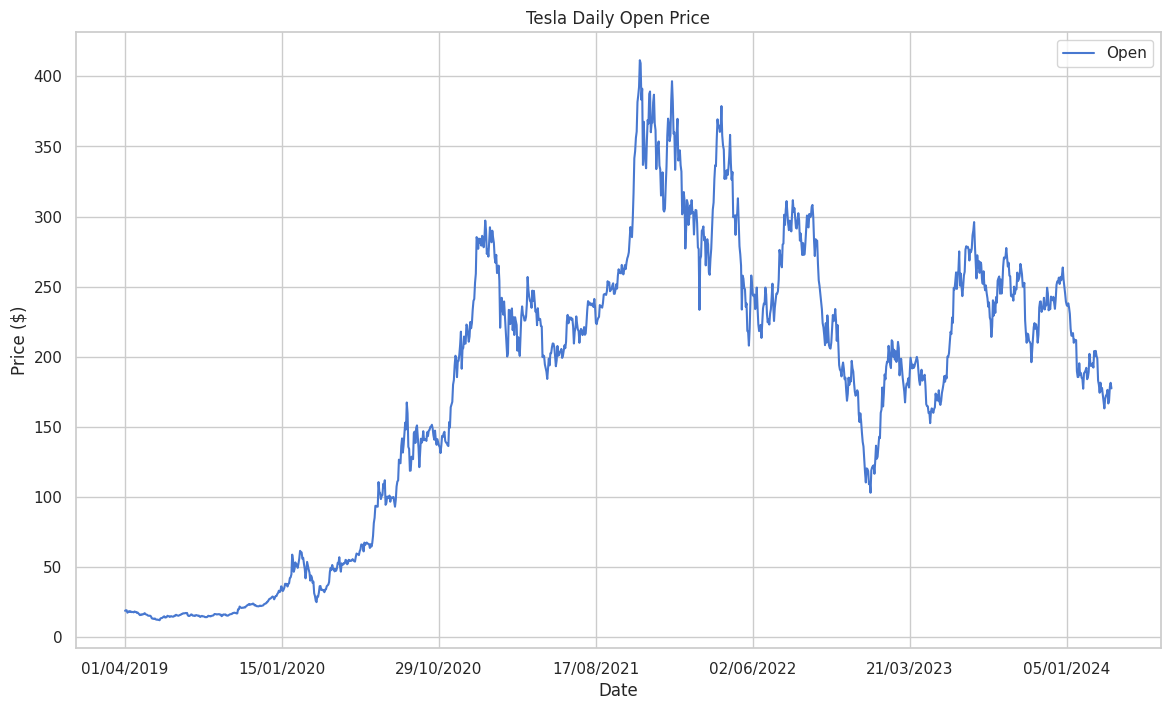

In [ ]:
#Visualizing Open
rcParams['figure.figsize'] = 14, 8
sns.set(style='whitegrid', palette='muted', font_scale=1)

ax = data.plot(x="Date", y="Open");
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Tesla Daily Open Price')

Text(0.5, 1.0, 'Tesla Daily High Price')

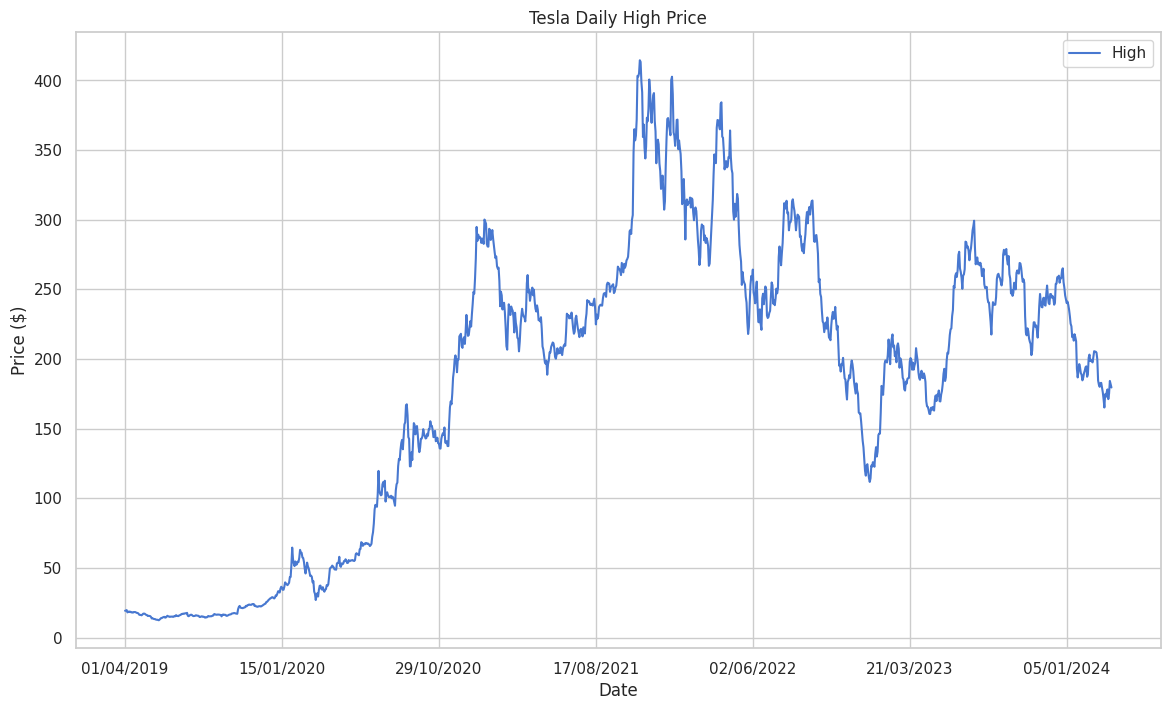

In [ ]:
#Visualizing High
ax = data.plot(x="Date", y="High");
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Tesla Daily High Price')

Text(0.5, 1.0, 'Tesla Daily Low Price')

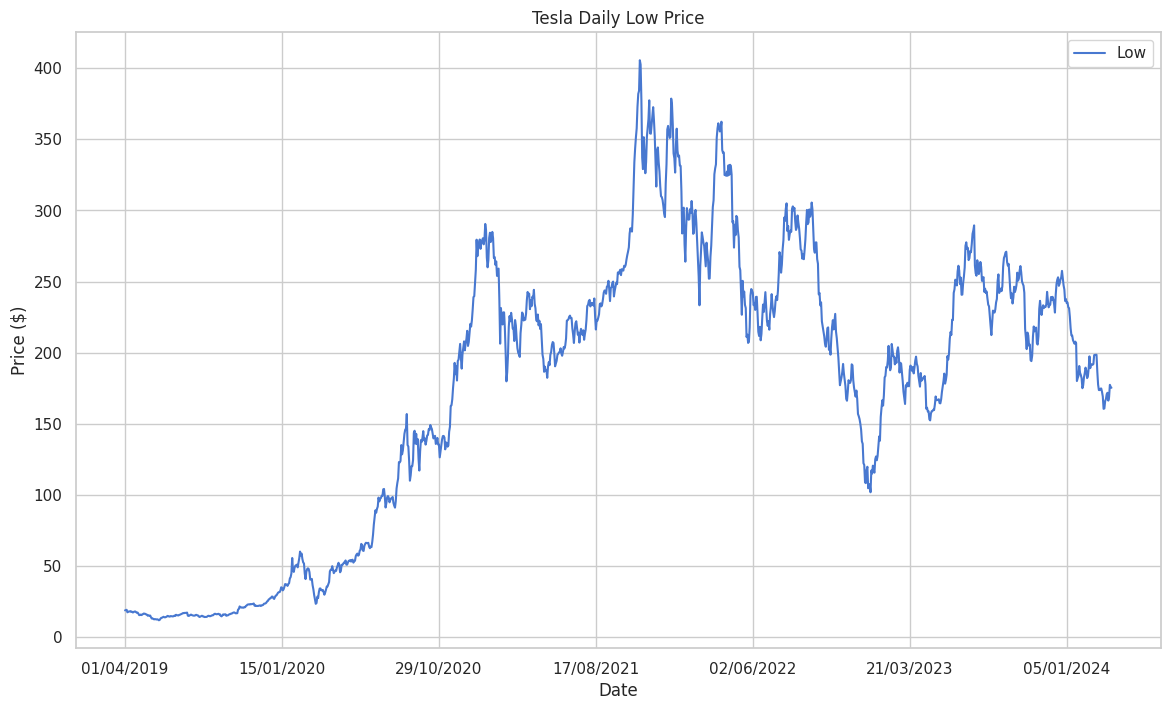

In [ ]:
#Visualizing Low
ax = data.plot(x="Date", y="Low");
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Tesla Daily Low Price')

Text(0.5, 1.0, 'Tesla Daily Close Price')

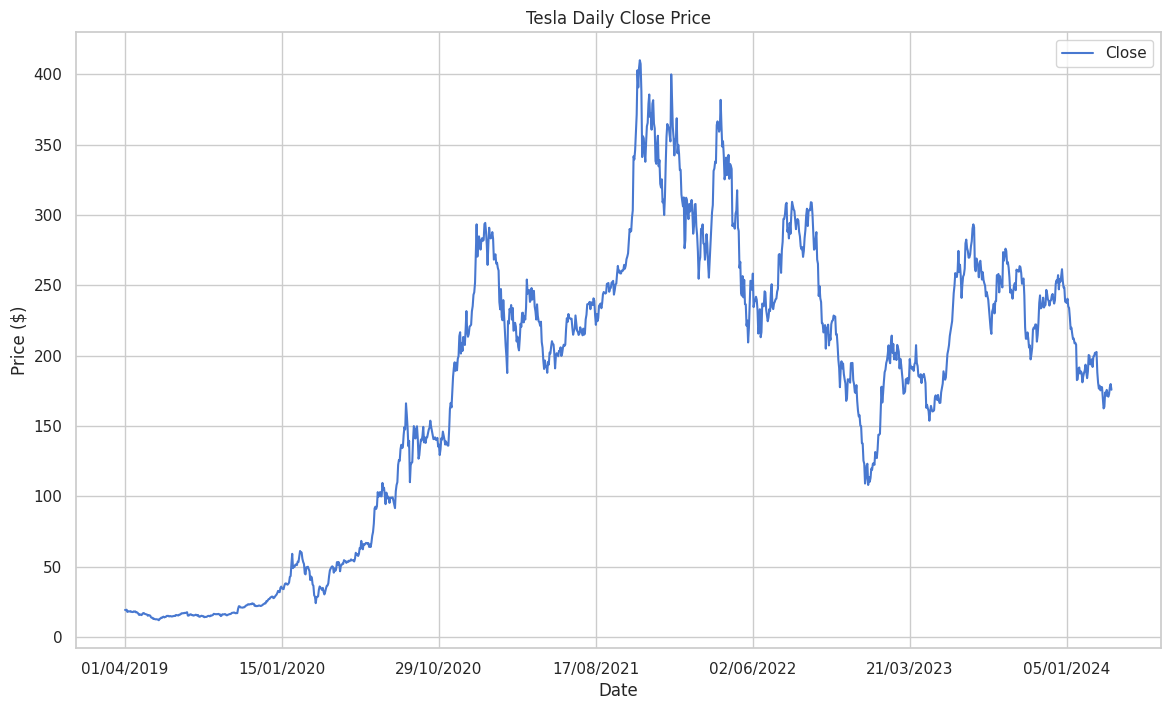

In [ ]:
#Visualizing Close
ax = data.plot(x="Date", y="Close");
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Tesla Daily Close Price')

Text(0.5, 1.0, 'Tesla Daily Adjusted Close Price')

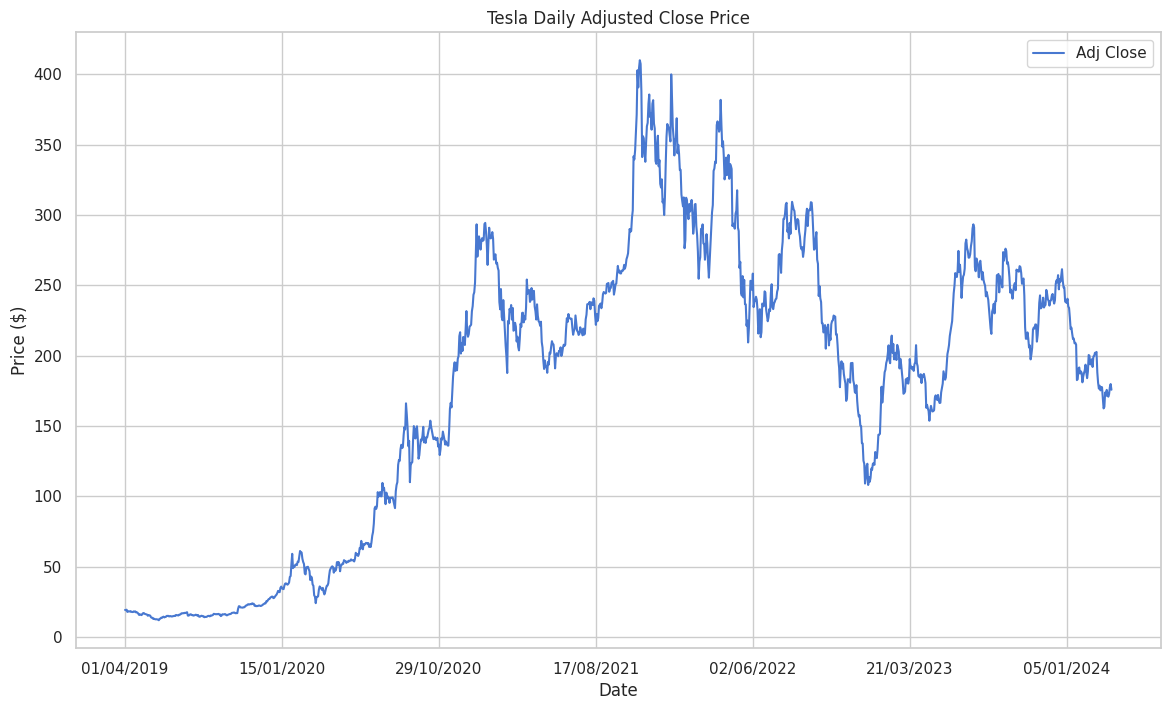

In [ ]:
#Visualizing Adjusted Close
ax = data.plot(x="Date", y="Adj Close");
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Tesla Daily Adjusted Close Price')

Text(0.5, 1.0, 'Tesla Daily Volume')

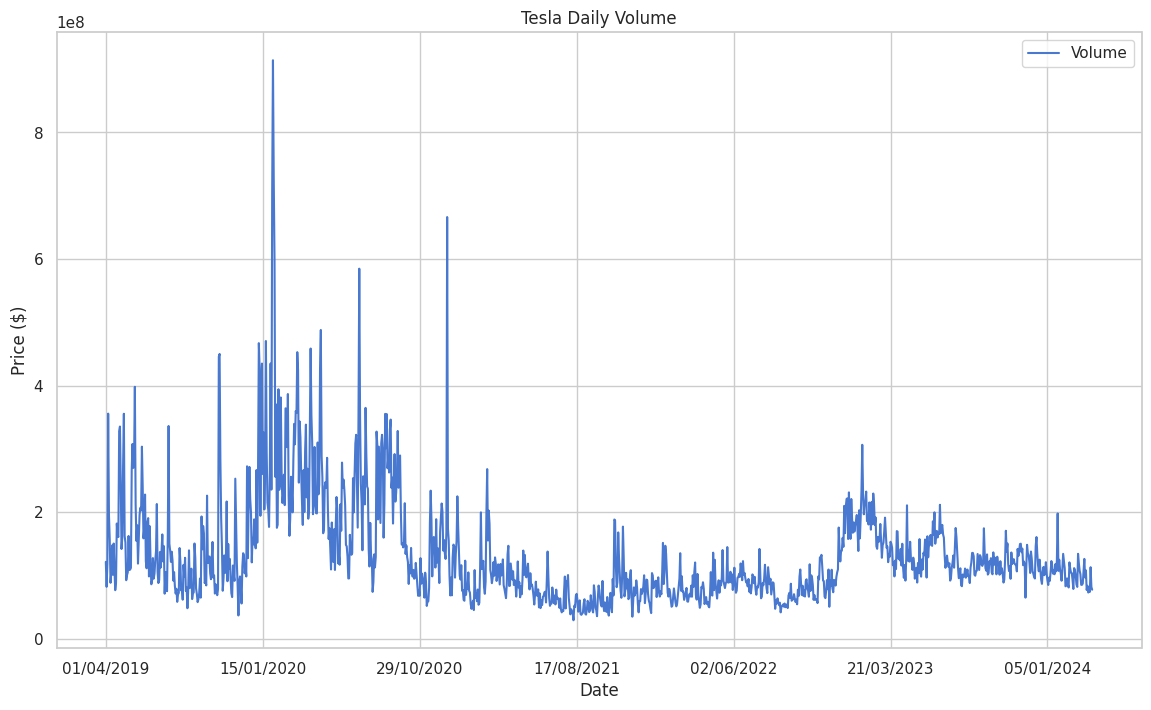

In [ ]:
#Visualizing Volume
ax = data.plot(x="Date", y="Volume");
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Tesla Daily Volume')

Text(0.5, 1.0, 'Tesla Daily Open Price vs Close Price')

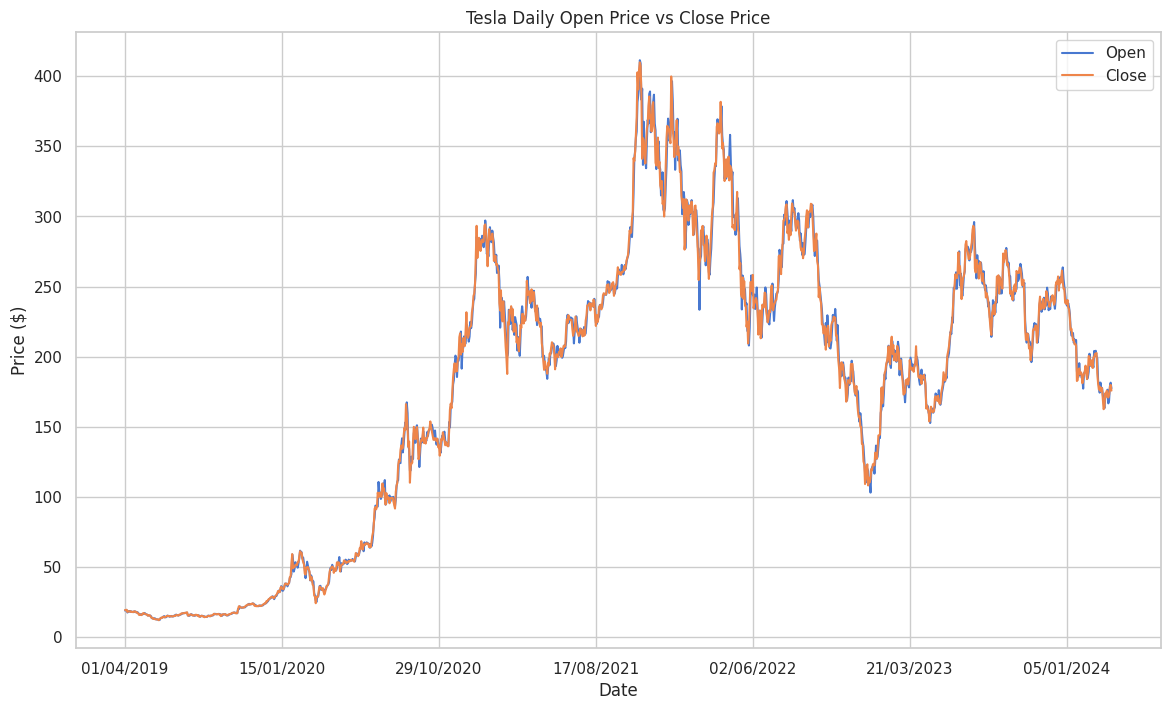

In [ ]:
#Open vs Close
ax = data.plot(x="Date", y=["Open", "Close"]);
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Tesla Daily Open Price vs Close Price')

Text(0.5, 1.0, 'Tesla Daily High Price vs Low Price')

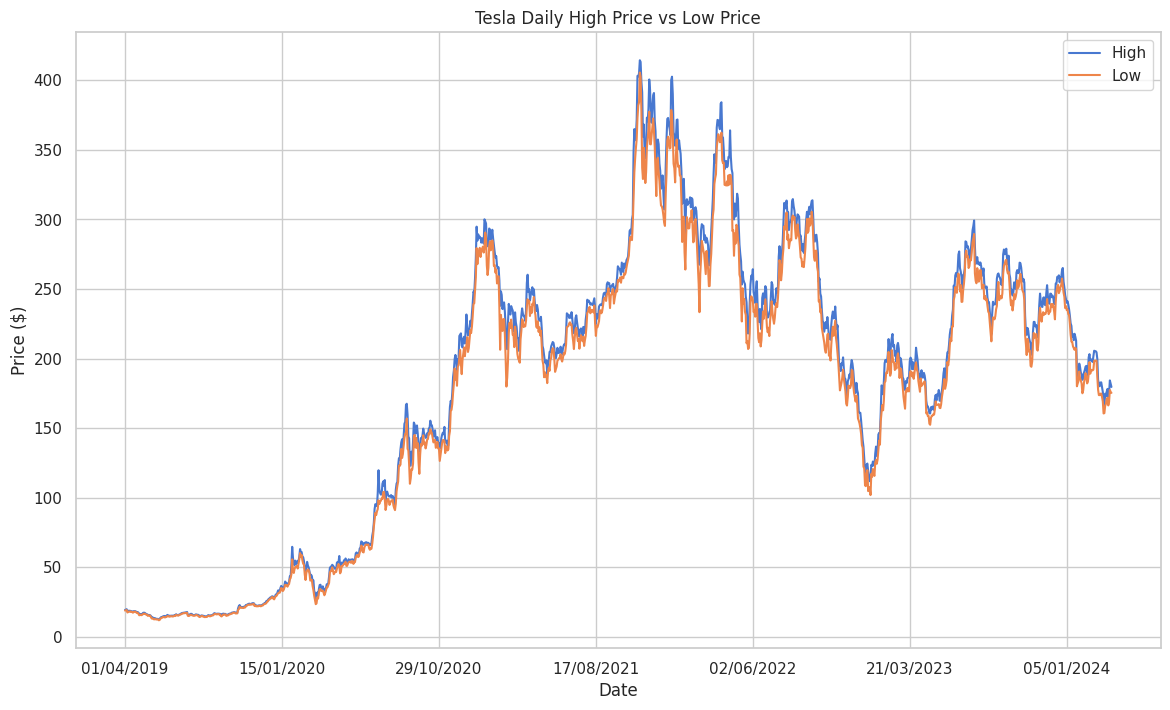

In [ ]:
#High vs Low
ax = data.plot(x="Date", y=["High", "Low"]);
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Tesla Daily High Price vs Low Price')

## **Data Preparation and Preprocessing**

In [ ]:
#Checking for null values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#Checking for duplicates
data.duplicated().sum()

0

In [ ]:
#Checking datatypes of the features
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
#Normalizing data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
open_price = data.Open.values.reshape(-1, 1)
scaled_open = scaler.fit_transform(open_price)

close_price = data.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

high_price = data.High.values.reshape(-1, 1)
scaled_high = scaler.fit_transform(high_price)

low_price = data.Low.values.reshape(-1, 1)
scaled_low = scaler.fit_transform(low_price)

vol = data.Volume.values.reshape(-1, 1)
scaled_vol = scaler.fit_transform(vol)

 ## **Model Building**

### *Method 1: Bidirectional LSTM*

In [ ]:
#Importing necessary libraries for LSTM
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
#Initializing sequence length and train and test sets
seq_length = 120
def splitseq(df, seq_length):
  n_seq = len(df) - seq_length + 1
  return np.array([df[i:(i+seq_length)] for i in range(n_seq)])

def train_test_sets(df, seq_length, train_frc):
  sequences = splitseq(df, seq_length)
  n_train = int(sequences.shape[0] * train_frc)
  x_train = sequences[:n_train, :-1, :]
  y_train = sequences[:n_train, -1, :]
  x_test = sequences[n_train:, :-1, :]
  y_test = sequences[n_train:, -1, :]
  return x_train, y_train, x_test, y_test

X_train, y_train, X_test, y_test = train_test_sets(scaled_open, seq_length, train_frc=0.8)

In [ ]:
#Building layers of the model
dropout = 0.2
window_size = seq_length - 1

model = keras.Sequential()

model.add(LSTM(window_size, return_sequences=True, input_shape=(window_size, X_train.shape[-1])))

model.add(Dropout(rate=dropout))
model.add(Bidirectional(LSTM(window_size * 2, return_sequences=True)))

model.add(Dropout(rate=dropout))
model.add(Bidirectional(LSTM(window_size, return_sequences=False)))

model.add(Dense(units=1))
model.add(Activation('linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Model fitting and validation
batch_size = 16
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=30, batch_size=batch_size, shuffle=False, validation_split=0.2)

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - loss: 0.0064 - val_loss: 0.0093
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 80s 964ms/step - loss: 0.0209 - val_loss: 0.0152
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 81s 954ms/step - loss: 0.0392 - val_loss: 0.0094
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 44s 963ms/step - loss: 0.0259 - val_loss: 0.0068
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 963ms/step - loss: 0.0271 - val_loss: 0.0063
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 968ms/step - loss: 0.0128 - val_loss: 0.0035
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 45s 976ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 44s 963ms/step - loss: 0.0194 - val_loss: 0.0042
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 44s 964ms/step - loss: 0.0118 - val_loss: 0.0042
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 83s 976ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 81s 975ms/step - loss: 0.0403 - val_loss: 0.0042
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 83s 9

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 574ms/step


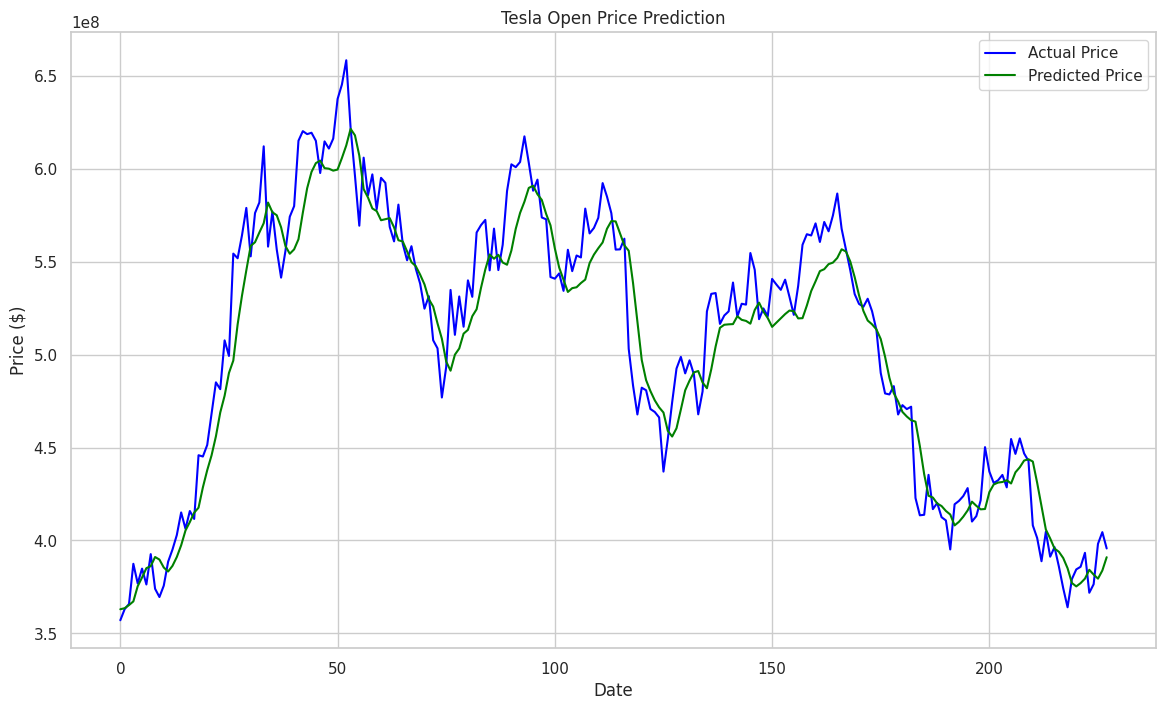

In [ ]:
#Plotting actual vs predicted prices
y_pred = model.predict(X_test)

y_test_org = scaler.inverse_transform(y_test)
y_pred_org = scaler.inverse_transform(y_pred)

plt.plot(y_test_org, label='Actual Price', color='blue')
plt.plot(y_pred_org, label='Predicted Price', color='green')

plt.title('Tesla Open Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc='best')

plt.show()

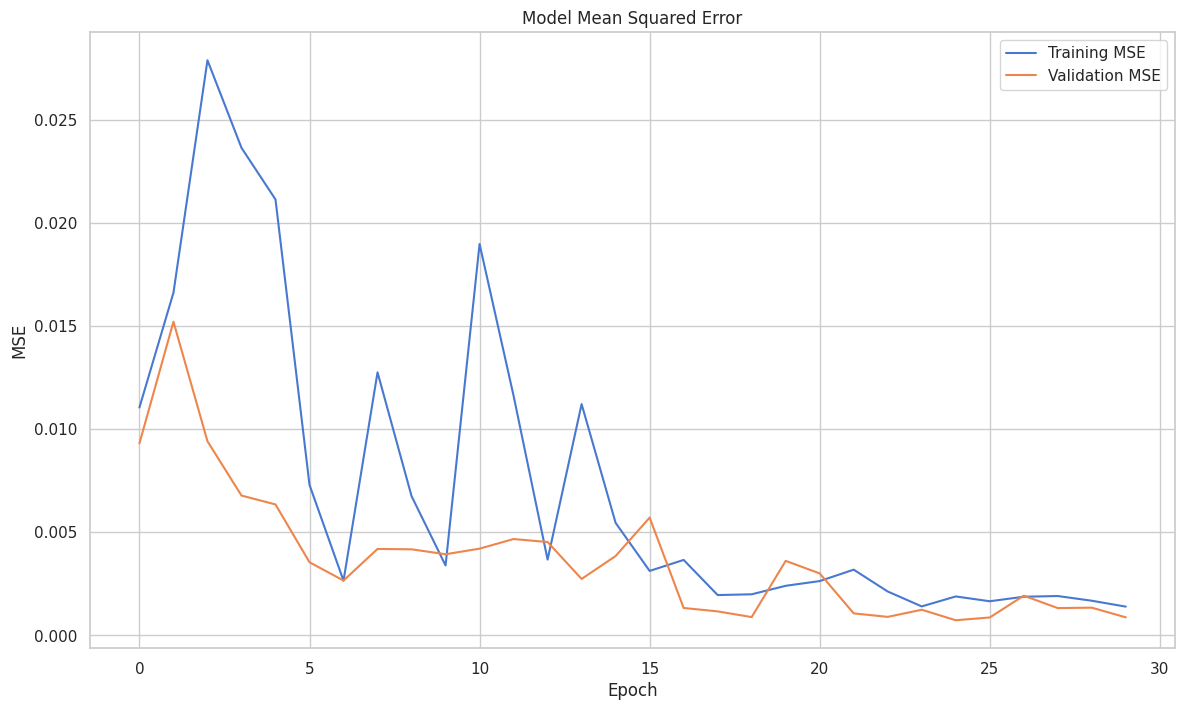

In [ ]:
#Plotting change in MSE over each epochs
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#Displaying final MSE
print("Final Training MSE:", history.history['loss'][-1])
print("Final Validation MSE:", history.history['val_loss'][-1])

Final Training MSE: 0.0013961843214929104
Final Validation MSE: 0.0008764723897911608


In [ ]:
#Initializing sequence length and train and test sets
seq_length = 120
def splitseq(df, seq_length):
  n_seq = len(df) - seq_length + 1
  return np.array([df[i:(i+seq_length)] for i in range(n_seq)])

def train_test_sets(df, seq_length, train_frc):
  sequences = splitseq(df, seq_length)
  n_train = int(sequences.shape[0] * train_frc)
  x_train = sequences[:n_train, :-1, :]
  y_train = sequences[:n_train, -1, :]
  x_test = sequences[n_train:, :-1, :]
  y_test = sequences[n_train:, -1, :]
  return x_train, y_train, x_test, y_test

X_train, y_train, X_test, y_test = train_test_sets(scaled_close, seq_length, train_frc=0.8)

In [ ]:
#Building layers of the model
dropout = 0.2
window_size = seq_length - 1

model = keras.Sequential()

model.add(LSTM(window_size, return_sequences=True, input_shape=(window_size, X_train.shape[-1])))

model.add(Dropout(rate=dropout))
model.add(Bidirectional(LSTM(window_size * 2, return_sequences=True)))

model.add(Dropout(rate=dropout))
model.add(Bidirectional(LSTM(window_size, return_sequences=False)))

model.add(Dense(units=1))
model.add(Activation('linear'))

In [ ]:
#Model fitting and validation
batch_size = 16
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=25, batch_size=batch_size, shuffle=False, validation_split=0.2)

Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - loss: 0.0062 - val_loss: 0.0101
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - loss: 0.0191 - val_loss: 0.0131
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - loss: 0.0341 - val_loss: 0.0098
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - loss: 0.0244 - val_loss: 0.0071
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - loss: 0.0251 - val_loss: 0.0073
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - loss: 0.0158 - val_loss: 0.0065
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - loss: 0.0056 - val_loss: 0.0041
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - loss: 0.0080 - val_loss: 0.0055
Epoch 9/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - loss: 0.0046 - val_loss: 0.0038
Epoch 10/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - loss: 0.0189 - val_loss: 0.0061
Epoch 11/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 998ms/step - loss: 0.0101 - val_loss: 0.0066
Epoch 12/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - loss: 0.0017 - val

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 405ms/step


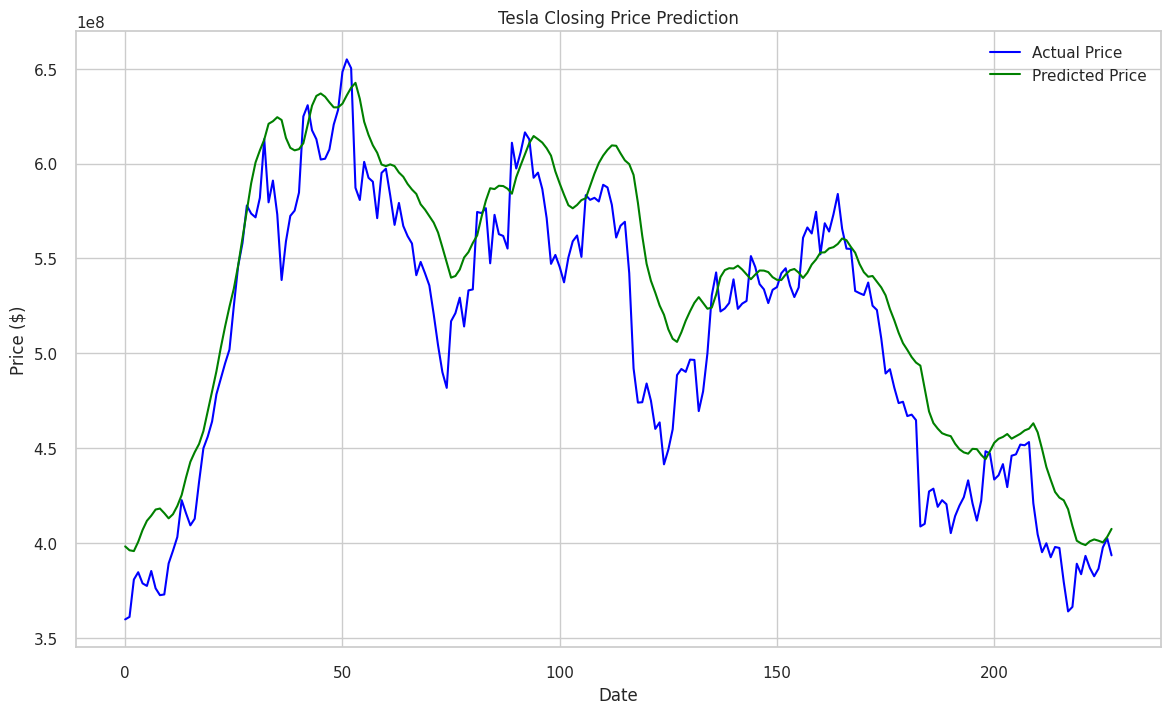

In [ ]:
#Plotting actual vs predicted prices
y_pred = model.predict(X_test)

y_test_org = scaler.inverse_transform(y_test)
y_pred_org = scaler.inverse_transform(y_pred)

plt.plot(y_test_org, label='Actual Price', color='blue')
plt.plot(y_pred_org, label='Predicted Price', color='green')

plt.title('Tesla Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc='best')

plt.show()

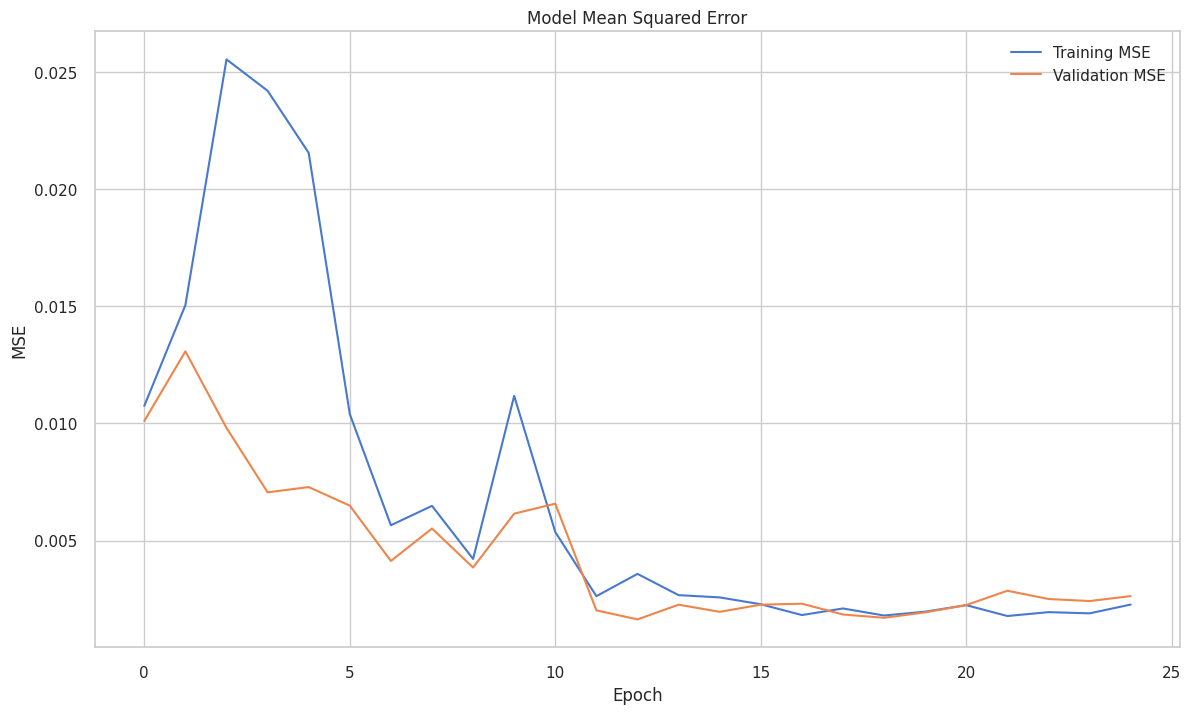

In [ ]:
#Plotting change in MSE over each epochs
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#Displaying final MSE
print("Final Training MSE:", history.history['loss'][-1])
print("Final Validation MSE:", history.history['val_loss'][-1])

Final Training MSE: 0.0022673816420137882
Final Validation MSE: 0.0026279871817678213


In [ ]:
#Initializing sequence length and train and test sets
seq_length = 120
def splitseq(df, seq_length):
  n_seq = len(df) - seq_length + 1
  return np.array([df[i:(i+seq_length)] for i in range(n_seq)])

def train_test_sets(df, seq_length, train_frc):
  sequences = splitseq(df, seq_length)
  n_train = int(sequences.shape[0] * train_frc)
  x_train = sequences[:n_train, :-1, :]
  y_train = sequences[:n_train, -1, :]
  x_test = sequences[n_train:, :-1, :]
  y_test = sequences[n_train:, -1, :]
  return x_train, y_train, x_test, y_test

X_train, y_train, X_test, y_test = train_test_sets(scaled_high, seq_length, train_frc=0.8)

In [ ]:
#Building layers of the model
dropout = 0.2
window_size = seq_length - 1

model = keras.Sequential()

model.add(LSTM(window_size, return_sequences=True, input_shape=(window_size, X_train.shape[-1])))

model.add(Dropout(rate=dropout))
model.add(Bidirectional(LSTM(window_size * 2, return_sequences=True)))

model.add(Dropout(rate=dropout))
model.add(Bidirectional(LSTM(window_size, return_sequences=False)))

model.add(Dense(units=1))
model.add(Activation('linear'))

In [ ]:
#Model fitting and validation
batch_size = 16
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, shuffle=False, validation_split=0.2)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - loss: 0.0069 - val_loss: 0.0084
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - loss: 0.0213 - val_loss: 0.0129
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 79s 985ms/step - loss: 0.0393 - val_loss: 0.0098
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 987ms/step - loss: 0.0247 - val_loss: 0.0073
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - loss: 0.0298 - val_loss: 0.0064
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 81s 992ms/step - loss: 0.0139 - val_loss: 0.0063
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - loss: 0.0059 - val_loss: 0.0031
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 45s 983ms/step - loss: 0.0082 - val_loss: 0.0042
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - loss: 0.0017 - val_loss: 0.0028
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - loss: 0.0258 - val_loss: 0.0058
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 80s 982ms/step - loss: 0.0242 - val_loss: 0.0027
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - loss: 

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 533ms/step


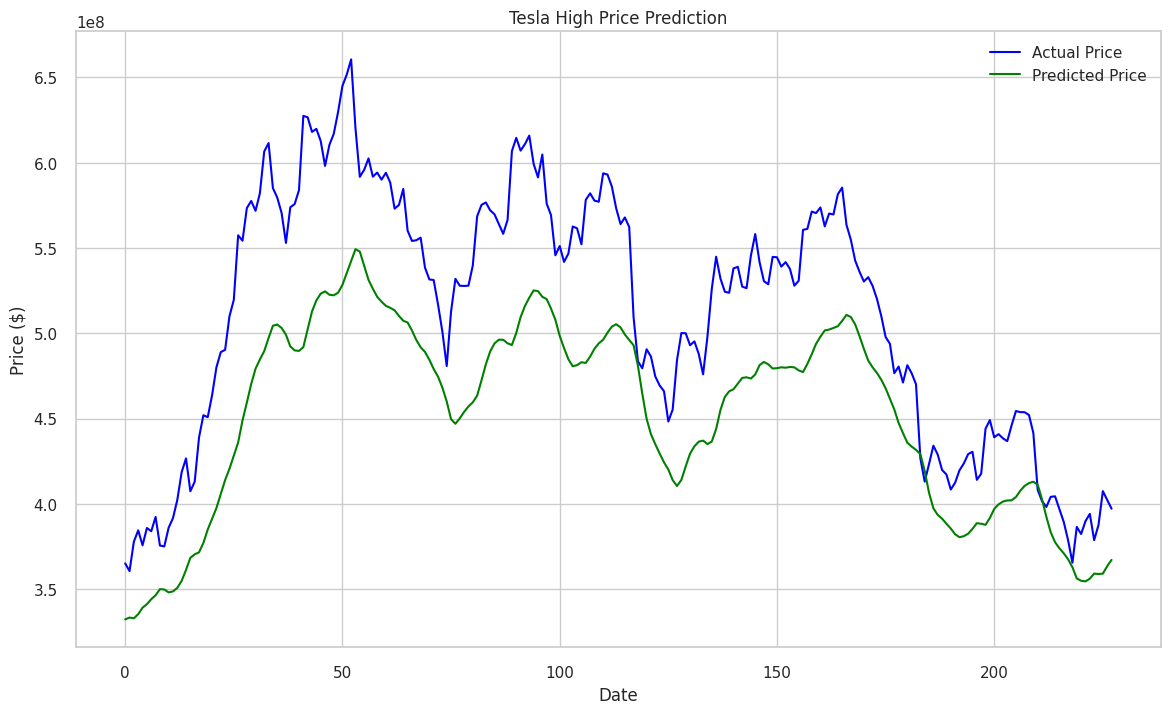

In [ ]:
#Plotting actual vs predicted prices
y_pred = model.predict(X_test)

y_test_org = scaler.inverse_transform(y_test)
y_pred_org = scaler.inverse_transform(y_pred)

plt.plot(y_test_org, label='Actual Price', color='blue')
plt.plot(y_pred_org, label='Predicted Price', color='green')

plt.title('Tesla High Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc='best')

plt.show()

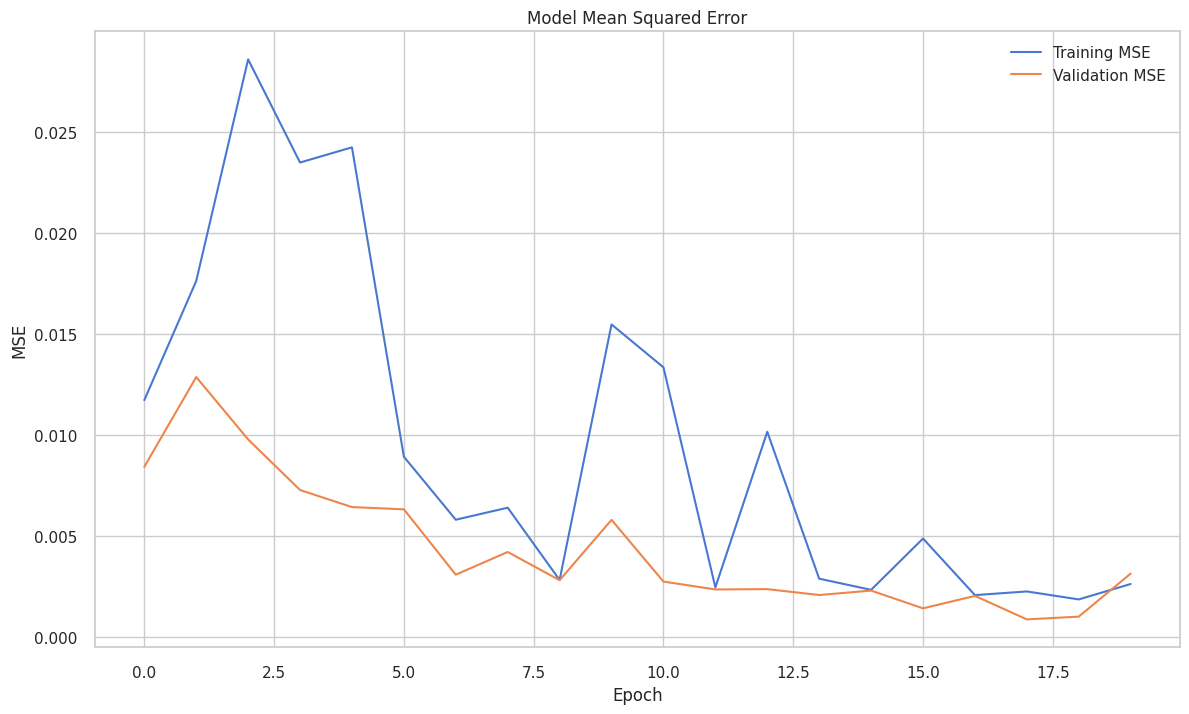

In [ ]:
#Plotting change in MSE over each epochs
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#Displaying final MSE
print("Final Training MSE:", history.history['loss'][-1])
print("Final Validation MSE:", history.history['val_loss'][-1])

Final Training MSE: 0.0026287452783435583
Final Validation MSE: 0.0031434556003659964


In [ ]:
#Initializing sequence length and train and test sets
seq_length = 120
def splitseq(df, seq_length):
  n_seq = len(df) - seq_length + 1
  return np.array([df[i:(i+seq_length)] for i in range(n_seq)])

def train_test_sets(df, seq_length, train_frc):
  sequences = splitseq(df, seq_length)
  n_train = int(sequences.shape[0] * train_frc)
  x_train = sequences[:n_train, :-1, :]
  y_train = sequences[:n_train, -1, :]
  x_test = sequences[n_train:, :-1, :]
  y_test = sequences[n_train:, -1, :]
  return x_train, y_train, x_test, y_test

X_train, y_train, X_test, y_test = train_test_sets(scaled_low, seq_length, train_frc=0.8)

In [ ]:
#Building layers of the model
dropout = 0.2
window_size = seq_length - 1

model = keras.Sequential()

model.add(LSTM(window_size, return_sequences=True, input_shape=(window_size, X_train.shape[-1])))

model.add(Dropout(rate=dropout))
model.add(Bidirectional(LSTM(window_size * 2, return_sequences=True)))

model.add(Dropout(rate=dropout))
model.add(Bidirectional(LSTM(window_size, return_sequences=False)))

model.add(Dense(units=1))
model.add(Activation('linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Model fitting and validation
batch_size = 16
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, shuffle=False, validation_split=0.2)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - loss: 0.0063 - val_loss: 0.0104
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - loss: 0.0183 - val_loss: 0.0148
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - loss: 0.0284 - val_loss: 0.0077
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - loss: 0.0222 - val_loss: 0.0121
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - loss: 0.0155 - val_loss: 0.0067
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - loss: 0.0184 - val_loss: 0.0069
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - loss: 0.0081 - val_loss: 0.0045
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - loss: 0.0018 - val_loss: 0.0035
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - loss: 0.0332 - val_loss: 0.0071
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - loss: 0.0259 - val_loss: 0.0072
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - loss: 0.0073 - val_loss: 0.0033
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - loss: 0.0016 - val_lo

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 423ms/step


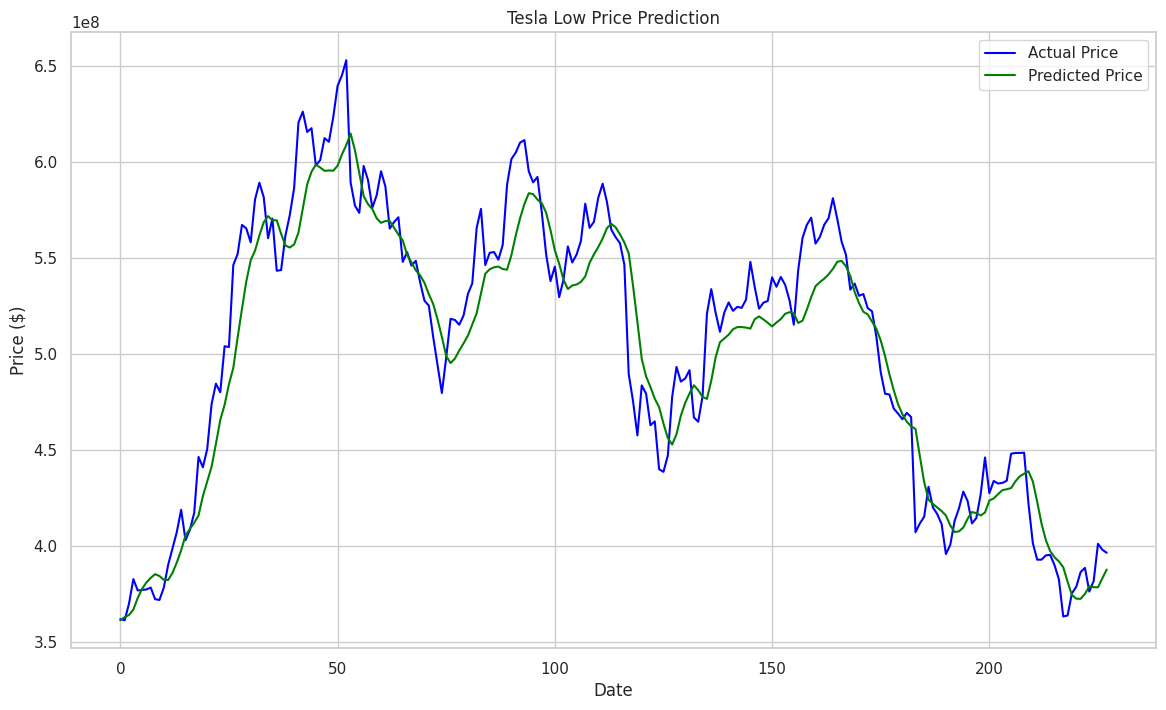

In [ ]:
#Plotting actual vs predicted prices
y_pred = model.predict(X_test)

y_test_org = scaler.inverse_transform(y_test)
y_pred_org = scaler.inverse_transform(y_pred)

plt.plot(y_test_org, label='Actual Price', color='blue')
plt.plot(y_pred_org, label='Predicted Price', color='green')

plt.title('Tesla Low Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc='best')

plt.show()

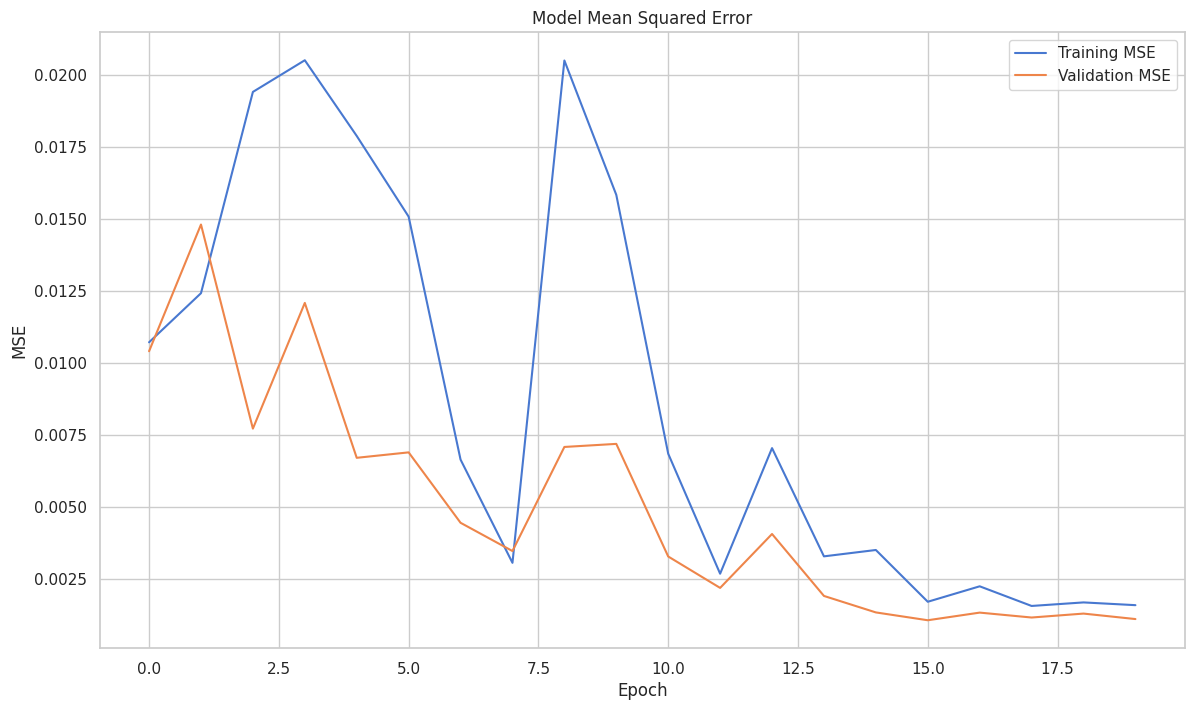

In [ ]:
#Plotting change in MSE over each epochs
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#Displaying final MSE
print("Final Training MSE:", history.history['loss'][-1])
print("Final Validation MSE:", history.history['val_loss'][-1])

Final Training MSE: 0.0015907887136563659
Final Validation MSE: 0.0011078407987952232


In [ ]:
#Initializing sequence length and train and test sets
seq_length = 120
def splitseq(df, seq_length):
  n_seq = len(df) - seq_length + 1
  return np.array([df[i:(i+seq_length)] for i in range(n_seq)])

def train_test_sets(df, seq_length, train_frc):
  sequences = splitseq(df, seq_length)
  n_train = int(sequences.shape[0] * train_frc)
  x_train = sequences[:n_train, :-1, :]
  y_train = sequences[:n_train, -1, :]
  x_test = sequences[n_train:, :-1, :]
  y_test = sequences[n_train:, -1, :]
  return x_train, y_train, x_test, y_test

X_train, y_train, X_test, y_test = train_test_sets(scaled_vol, seq_length, train_frc=0.8)

In [ ]:
#Building layers of the model
dropout = 0.2
window_size = seq_length - 1

model = keras.Sequential()

model.add(LSTM(window_size, return_sequences=True, input_shape=(window_size, X_train.shape[-1])))

model.add(Dropout(rate=dropout))
model.add(Bidirectional(LSTM(window_size * 2, return_sequences=True)))

model.add(Dropout(rate=dropout))
model.add(Bidirectional(LSTM(window_size, return_sequences=False)))

model.add(Dense(units=1))
model.add(Activation('linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Model fitting and validation
batch_size = 16
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, shuffle=False, validation_split=0.2)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - loss: 0.0208 - val_loss: 0.0036
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - loss: 0.0160 - val_loss: 0.0031
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - loss: 0.0159 - val_loss: 0.0027
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - loss: 0.0133 - val_loss: 0.0033
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - loss: 0.0161 - val_loss: 0.0023
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - loss: 0.0134 - val_loss: 0.0023
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - loss: 0.0156 - val_loss: 0.0019
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - loss: 0.0122 - val_loss: 0.0021
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - loss: 0.0138 - val_loss: 0.0021
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - loss: 0.0111 - val_loss: 0.0027
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - loss: 0.0143 - val_loss: 0.0018
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - loss: 0.0118 - val_lo

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 531ms/step


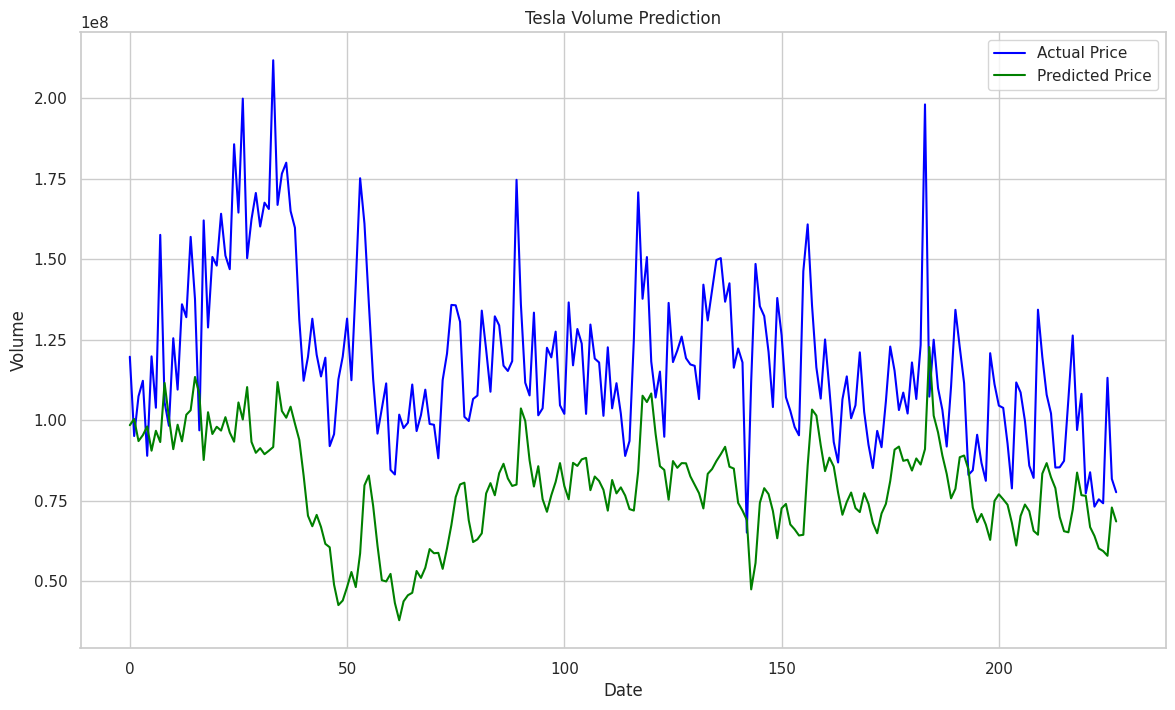

In [ ]:
#Plotting actual vs predicted prices
y_pred = model.predict(X_test)

y_test_org = scaler.inverse_transform(y_test)
y_pred_org = scaler.inverse_transform(y_pred)

plt.plot(y_test_org, label='Actual Price', color='blue')
plt.plot(y_pred_org, label='Predicted Price', color='green')

plt.title('Tesla Volume Prediction')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='best')

plt.show()

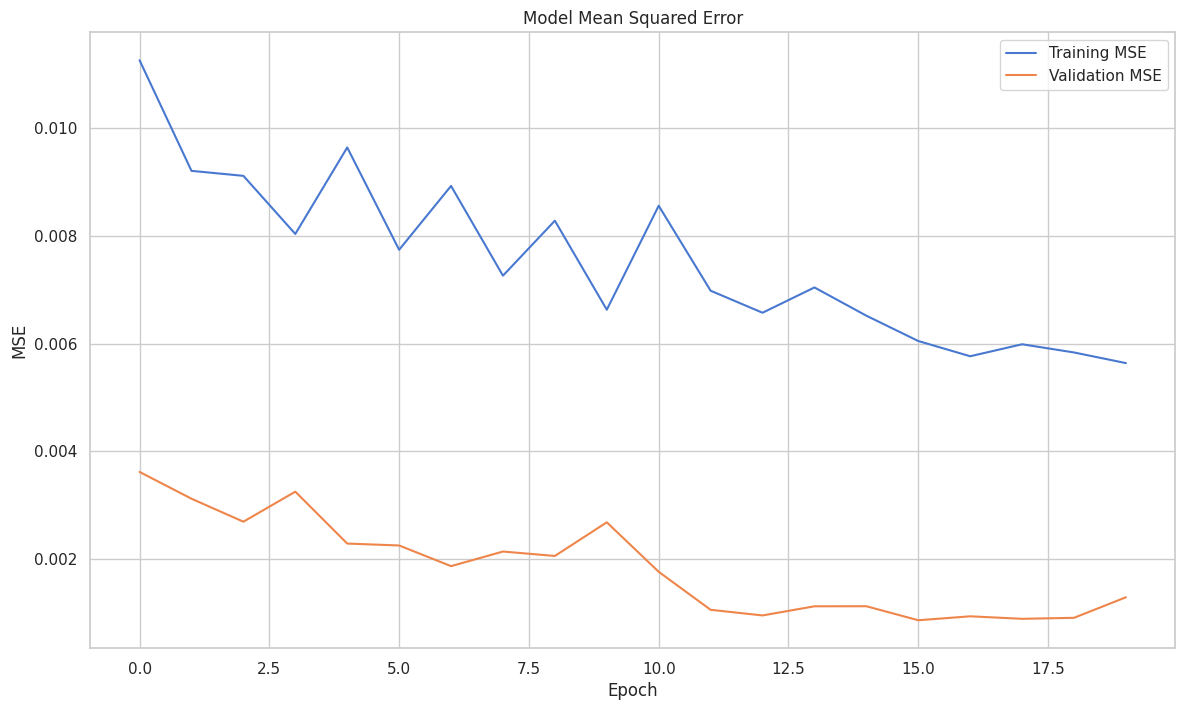

In [ ]:
#Plotting change in MSE over each epochs
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#Displaying final MSE
print("Final Training MSE:", history.history['loss'][-1])
print("Final Validation MSE:", history.history['val_loss'][-1])

Final Training MSE: 0.005638534668833017
Final Validation MSE: 0.001292604603804648


### *Method 2: Support Vector Regression*

In [ ]:
# Importing SVR and Mean Squared Error
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
#Model initialization
model = SVR(kernel='rbf', gamma=0.5, C=10, epsilon=0.05)

In [ ]:
#Training and Test split
open_train = scaled_open[:900]
open_test = scaled_open[900:]
close_train = scaled_close[:900]
close_test = scaled_close[900:]
high_train = scaled_high[:900]
high_test = scaled_high[900:]
low_train = scaled_low[:900]
low_test = scaled_low[900:]
volume_train = scaled_vol[:900]
volume_test = scaled_vol[900:]

In [ ]:
#Creating X_train, X_test, y_train, y_test
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:i + time_steps]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 5
X_train, y_train = create_dataset(open_train, open_train, TIME_STEPS)
X_test, y_test = create_dataset(open_test, open_test, TIME_STEPS)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(895, 5, 1) (895, 1)
(353, 5, 1) (353, 1)


In [ ]:
#Model fitting
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

SVR(C=10, epsilon=0.05, gamma=0.5)

In [ ]:
#Predicting values and inverse scaling
train_pred = model.predict(X_train.reshape(X_train.shape[0], -1))
test_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

train_pred_inv = scaler.inverse_transform(train_pred.reshape(-1, 1))
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
test_pred_inv = scaler.inverse_transform(test_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
#Calculating MSE
mse_train = mean_squared_error(y_train_inv, train_pred_inv)
mse_test = mean_squared_error(y_test_inv, test_pred_inv)
print("Mean Squared Error on Training Data:", mse_train)
print("Mean Squared Error on Testing Data:", mse_test)

Mean Squared Error on Training Data: 697012128003224.0
Mean Squared Error on Testing Data: 298971601747315.9


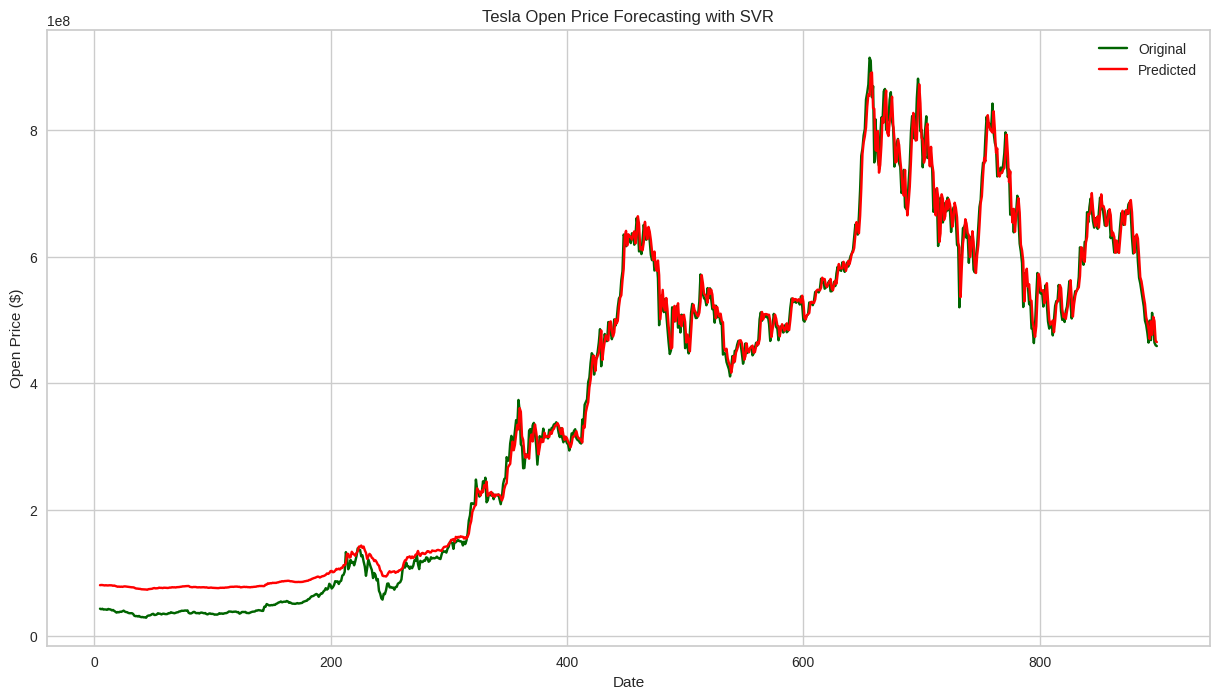

In [ ]:
#Plotting actual vs predicted for training set
plt.figure(figsize=(15, 8))
plt.plot(data.index[TIME_STEPS:TIME_STEPS+len(train_pred_inv)], y_train_inv, label='Original', color='darkgreen')
plt.plot(data.index[TIME_STEPS:TIME_STEPS+len(train_pred_inv)], train_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Open Price ($)')
plt.title('Tesla Open Price Forecasting with SVR')
plt.legend()
plt.show()

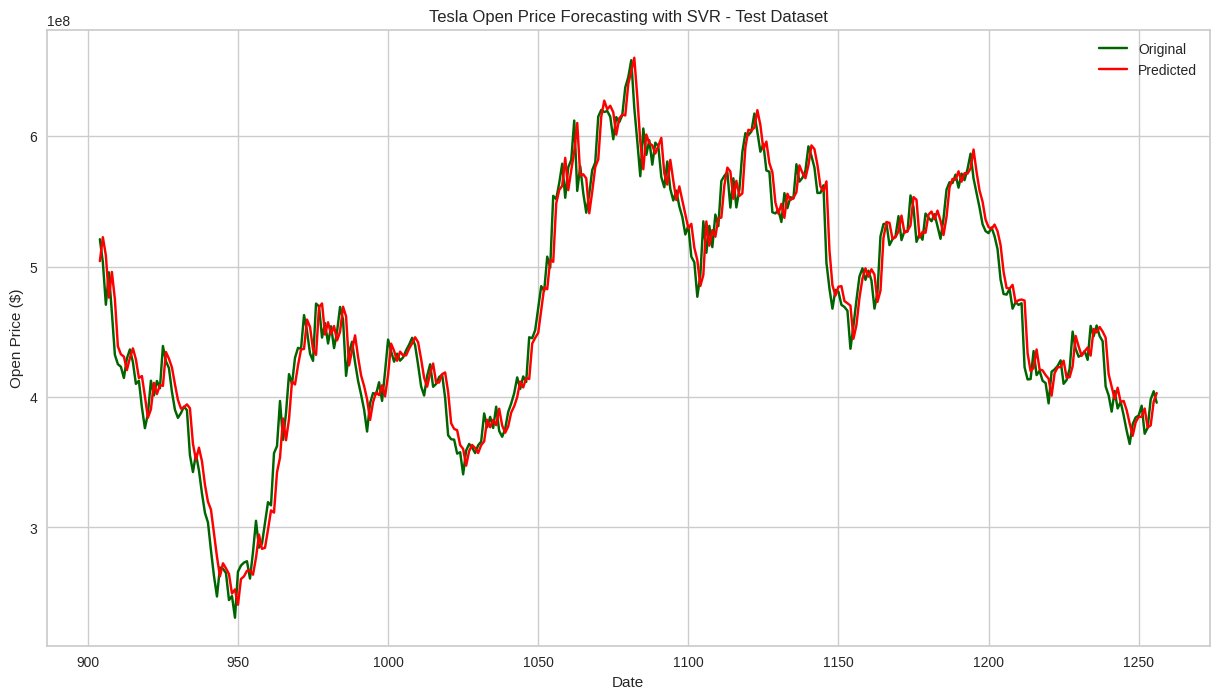

In [ ]:
#Plotting actual vs predicted for test set
y_test_inv = y_test_inv.flatten()

x_values = data.index[TIME_STEPS+len(train_pred_inv)+TIME_STEPS-1 : TIME_STEPS+len(train_pred_inv)+TIME_STEPS-1 + len(y_test_inv)]

plt.figure(figsize=(15, 8))
plt.plot(x_values, y_test_inv, label='Original', color='darkgreen')
plt.plot(x_values, test_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Open Price ($)')
plt.title('Tesla Open Price Forecasting with SVR - Test Dataset')
plt.legend()
plt.show()

In [ ]:
#Creating X_train, X_test, y_train, y_test
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:i + time_steps]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 5
X_train, y_train = create_dataset(close_train, close_train, TIME_STEPS)
X_test, y_test = create_dataset(close_test, close_test, TIME_STEPS)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(895, 5, 1) (895, 1)
(353, 5, 1) (353, 1)


In [ ]:
#Model fitting
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, epsilon=0.05, gamma=0.5)

In [ ]:
#Predicting values and inverse scaling
train_pred = model.predict(X_train.reshape(X_train.shape[0], -1))
test_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

train_pred_inv = scaler.inverse_transform(train_pred.reshape(-1, 1))
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
test_pred_inv = scaler.inverse_transform(test_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
#Calculating MSE
mse_train = mean_squared_error(y_train_inv, train_pred_inv)
mse_test = mean_squared_error(y_test_inv, test_pred_inv)
print("Mean Squared Error on Training Data:", mse_train)
print("Mean Squared Error on Testing Data:", mse_test)

Mean Squared Error on Training Data: 448409406884504.1
Mean Squared Error on Testing Data: 274386063370211.84


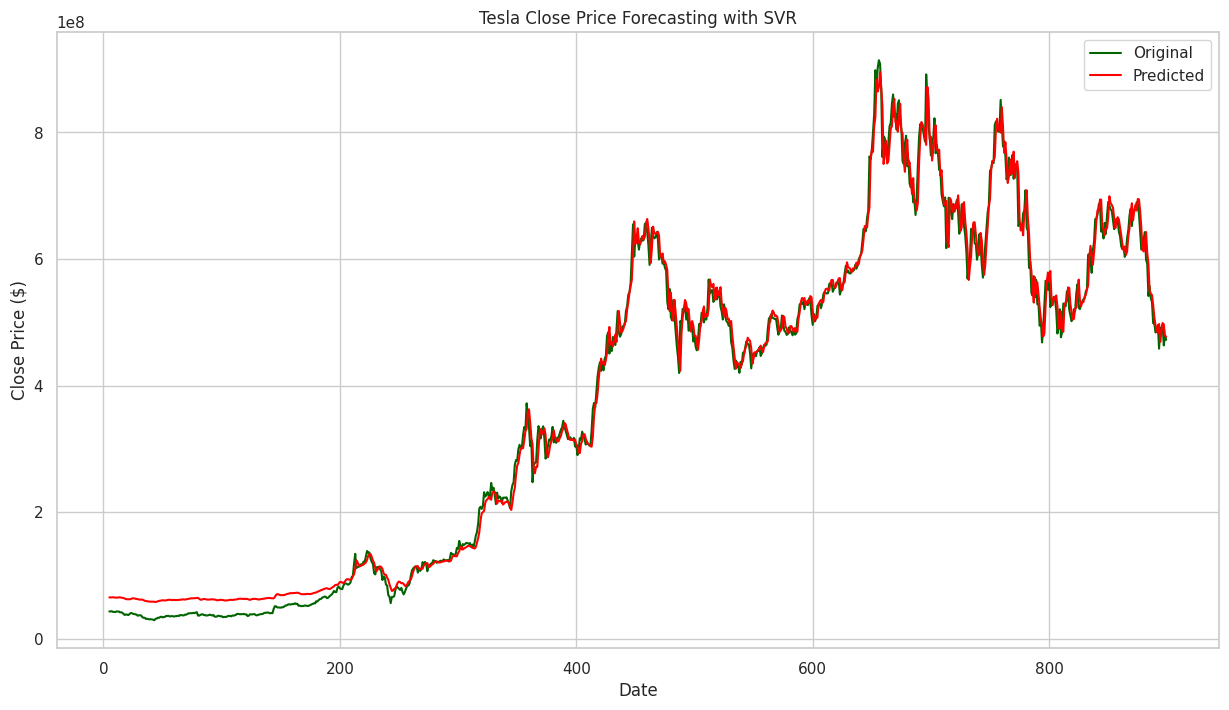

In [ ]:
#Plotting actual vs predicted for training set
plt.figure(figsize=(15, 8))
plt.plot(data.index[TIME_STEPS:TIME_STEPS+len(train_pred_inv)], y_train_inv, label='Original', color='darkgreen')
plt.plot(data.index[TIME_STEPS:TIME_STEPS+len(train_pred_inv)], train_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.title('Tesla Close Price Forecasting with SVR')
plt.legend()
plt.show()

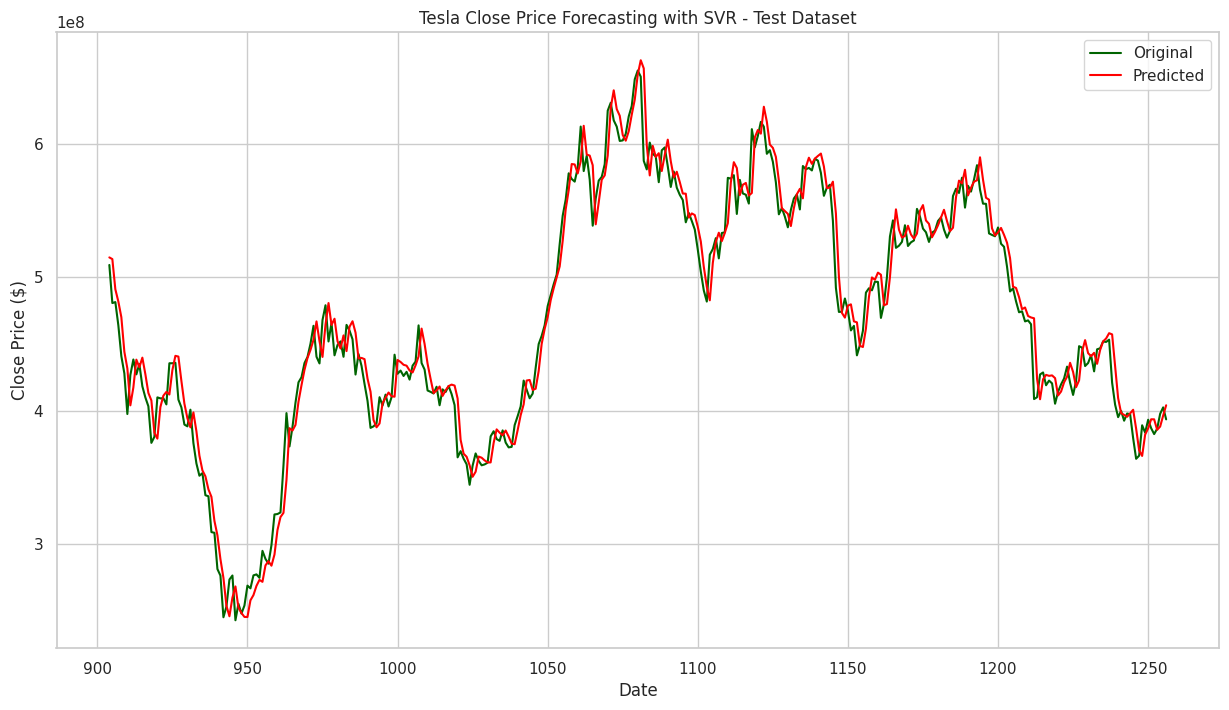

In [ ]:
#Plotting actual vs predicted for test set
y_test_inv = y_test_inv.flatten()

x_values = data.index[TIME_STEPS+len(train_pred_inv)+TIME_STEPS-1 : TIME_STEPS+len(train_pred_inv)+TIME_STEPS-1 + len(y_test_inv)]

plt.figure(figsize=(15, 8))
plt.plot(x_values, y_test_inv, label='Original', color='darkgreen')
plt.plot(x_values, test_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.title('Tesla Close Price Forecasting with SVR - Test Dataset')
plt.legend()
plt.show()

In [ ]:
#Creating X_train, X_test, y_train, y_test
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:i + time_steps]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 5
X_train, y_train = create_dataset(high_train, high_train, TIME_STEPS)
X_test, y_test = create_dataset(high_test, high_test, TIME_STEPS)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(895, 5, 1) (895, 1)
(353, 5, 1) (353, 1)


In [ ]:
#Model fitting
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, epsilon=0.05, gamma=0.5)

In [ ]:
#Predicting values and inverse scaling
train_pred = model.predict(X_train.reshape(X_train.shape[0], -1))
test_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

train_pred_inv = scaler.inverse_transform(train_pred.reshape(-1, 1))
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
test_pred_inv = scaler.inverse_transform(test_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
#Calculating MSE
mse_train = mean_squared_error(y_train_inv, train_pred_inv)
mse_test = mean_squared_error(y_test_inv, test_pred_inv)
print("Mean Squared Error on Training Data:", mse_train)
print("Mean Squared Error on Testing Data:", mse_test)

Mean Squared Error on Training Data: 614206706316846.2
Mean Squared Error on Testing Data: 223173851795973.34


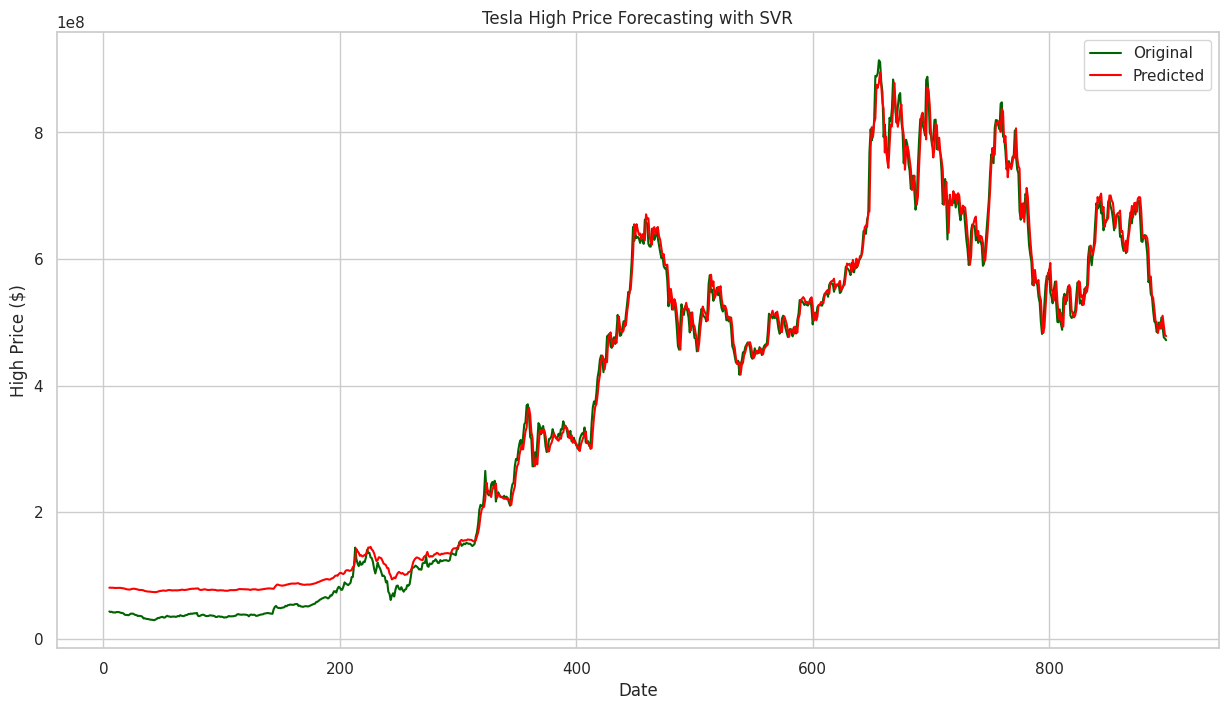

In [ ]:
#Plotting actual vs predicted for training set
plt.figure(figsize=(15, 8))
plt.plot(data.index[TIME_STEPS:TIME_STEPS+len(train_pred_inv)], y_train_inv, label='Original', color='darkgreen')
plt.plot(data.index[TIME_STEPS:TIME_STEPS+len(train_pred_inv)], train_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('High Price ($)')
plt.title('Tesla High Price Forecasting with SVR')
plt.legend()
plt.show()

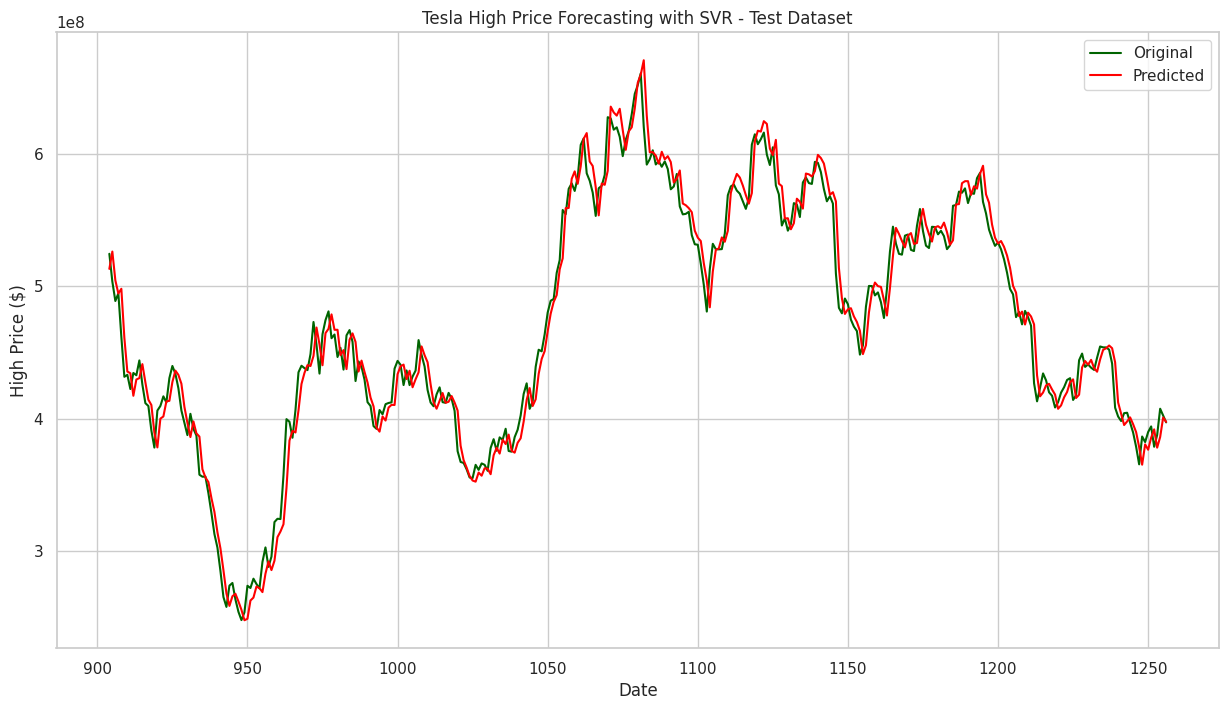

In [ ]:
#Plotting actual vs predicted for test set
y_test_inv = y_test_inv.flatten()

x_values = data.index[TIME_STEPS+len(train_pred_inv)+TIME_STEPS-1 : TIME_STEPS+len(train_pred_inv)+TIME_STEPS-1 + len(y_test_inv)]

plt.figure(figsize=(15, 8))
plt.plot(x_values, y_test_inv, label='Original', color='darkgreen')
plt.plot(x_values, test_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('High Price ($)')
plt.title('Tesla High Price Forecasting with SVR - Test Dataset')
plt.legend()
plt.show()

In [ ]:
#Creating X_train, X_test, y_train, y_test
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:i + time_steps]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 5
X_train, y_train = create_dataset(low_train, low_train, TIME_STEPS)
X_test, y_test = create_dataset(low_test, low_test, TIME_STEPS)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(895, 5, 1) (895, 1)
(353, 5, 1) (353, 1)


In [ ]:
#Model fitting
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, epsilon=0.05, gamma=0.5)

In [ ]:
#Predicting values and inverse scaling
train_pred = model.predict(X_train.reshape(X_train.shape[0], -1))
test_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

train_pred_inv = scaler.inverse_transform(train_pred.reshape(-1, 1))
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
test_pred_inv = scaler.inverse_transform(test_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
#Calculating MSE
mse_train = mean_squared_error(y_train_inv, train_pred_inv)
mse_test = mean_squared_error(y_test_inv, test_pred_inv)
print("Mean Squared Error on Training Data:", mse_train)
print("Mean Squared Error on Testing Data:", mse_test)

Mean Squared Error on Training Data: 634712856973209.9
Mean Squared Error on Testing Data: 224912156581134.16


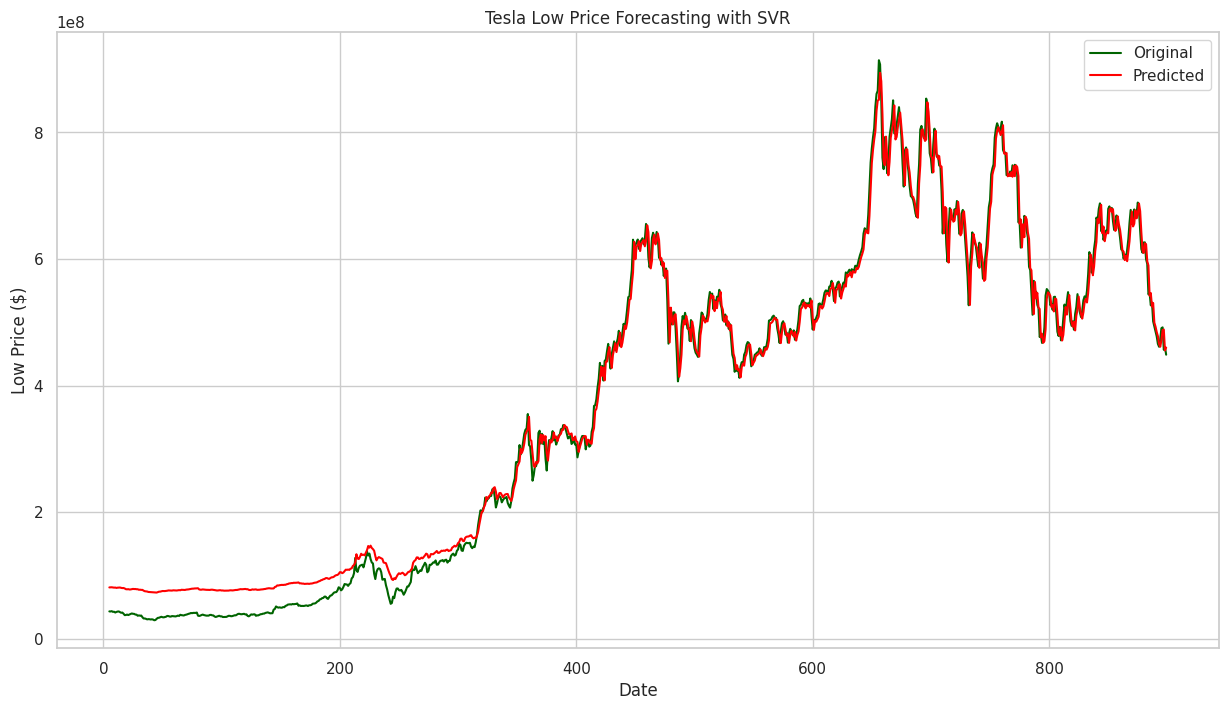

In [ ]:
#Plotting actual vs predicted for training set
plt.figure(figsize=(15, 8))
plt.plot(data.index[TIME_STEPS:TIME_STEPS+len(train_pred_inv)], y_train_inv, label='Original', color='darkgreen')
plt.plot(data.index[TIME_STEPS:TIME_STEPS+len(train_pred_inv)], train_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Low Price ($)')
plt.title('Tesla Low Price Forecasting with SVR')
plt.legend()
plt.show()

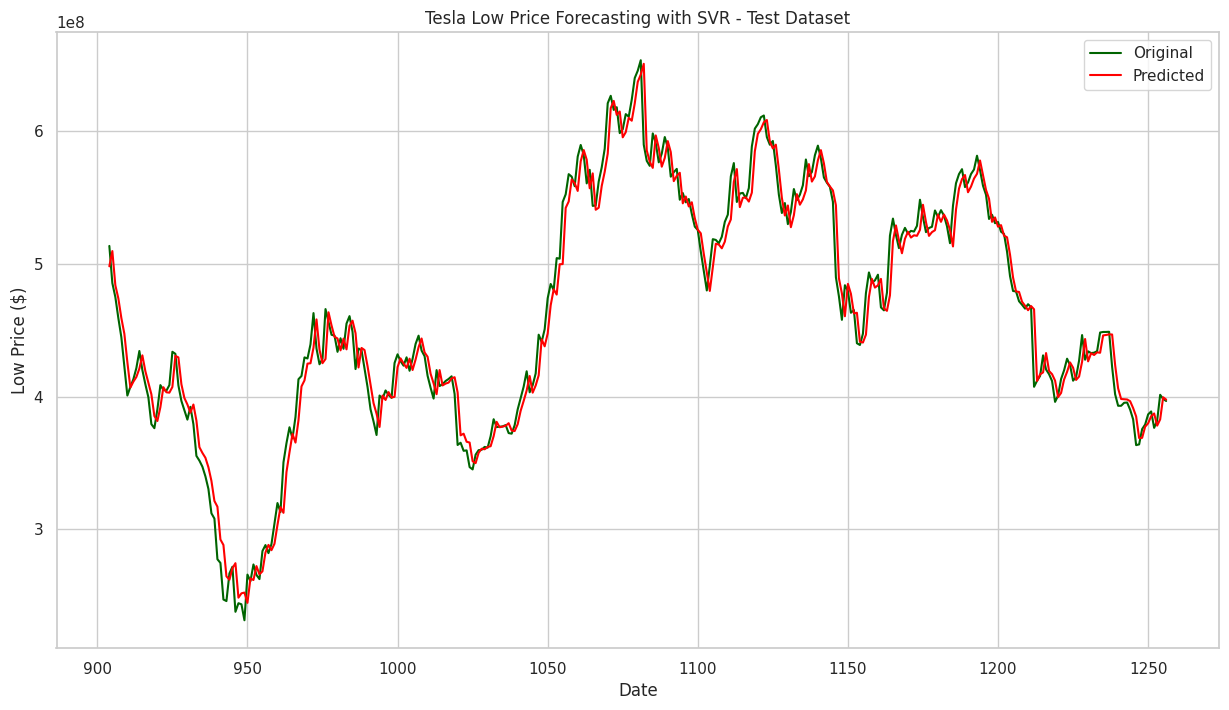

In [ ]:
#Plotting actual vs predicted for test set
y_test_inv = y_test_inv.flatten()

x_values = data.index[TIME_STEPS+len(train_pred_inv)+TIME_STEPS-1 : TIME_STEPS+len(train_pred_inv)+TIME_STEPS-1 + len(y_test_inv)]

plt.figure(figsize=(15, 8))
plt.plot(x_values, y_test_inv, label='Original', color='darkgreen')
plt.plot(x_values, test_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Low Price ($)')
plt.title('Tesla Low Price Forecasting with SVR - Test Dataset')
plt.legend()
plt.show()

In [ ]:
#Creating X_train, X_test, y_train, y_test
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:i + time_steps]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 5
X_train, y_train = create_dataset(volume_train, volume_train, TIME_STEPS)
X_test, y_test = create_dataset(volume_test, volume_test, TIME_STEPS)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(895, 5, 1) (895, 1)
(353, 5, 1) (353, 1)


In [ ]:
#Model fitting
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, epsilon=0.05, gamma=0.5)

In [ ]:
#Predicting values and inverse scaling
train_pred = model.predict(X_train.reshape(X_train.shape[0], -1))
test_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

train_pred_inv = scaler.inverse_transform(train_pred.reshape(-1, 1))
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
test_pred_inv = scaler.inverse_transform(test_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
#Calculating MSE
mse_train = mean_squared_error(y_train_inv, train_pred_inv)
mse_test = mean_squared_error(y_test_inv, test_pred_inv)
print("Mean Squared Error on Training Data:", mse_train)
print("Mean Squared Error on Testing Data:", mse_test)

Mean Squared Error on Training Data: 3088000927304315.5
Mean Squared Error on Testing Data: 585628817017195.9


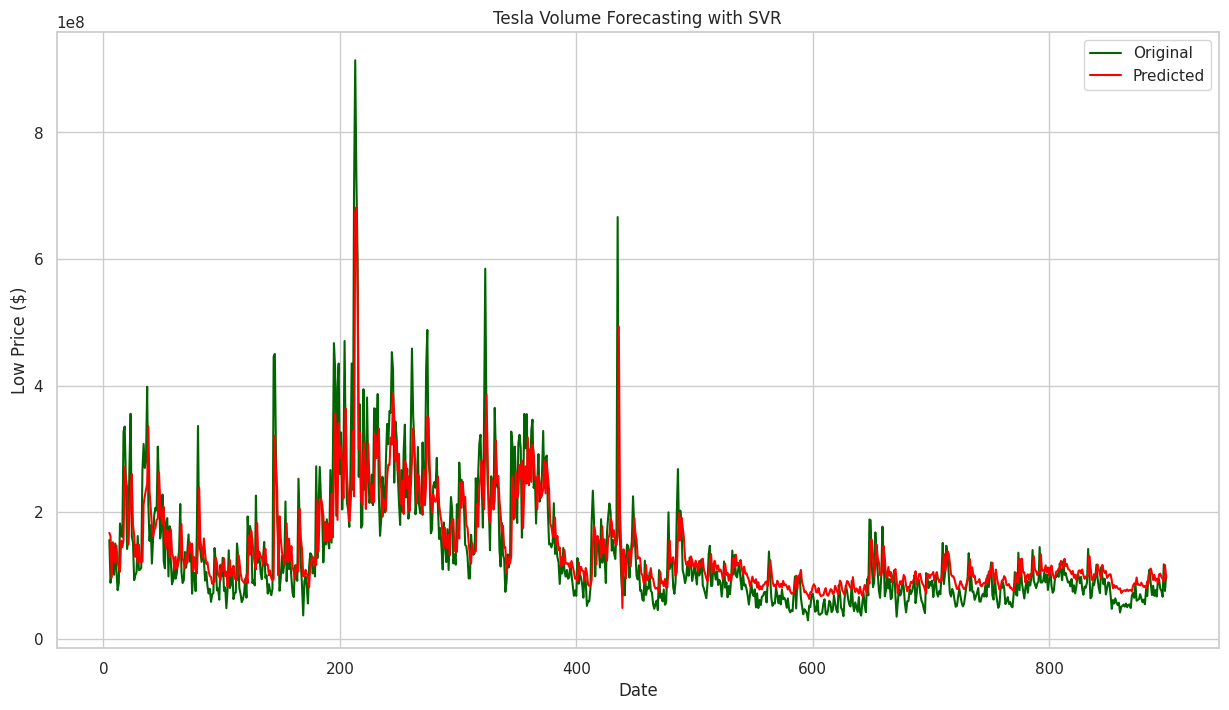

In [ ]:
#Plotting actual vs predicted for training set
plt.figure(figsize=(15, 8))
plt.plot(data.index[TIME_STEPS:TIME_STEPS+len(train_pred_inv)], y_train_inv, label='Original', color='darkgreen')
plt.plot(data.index[TIME_STEPS:TIME_STEPS+len(train_pred_inv)], train_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Low Price ($)')
plt.title('Tesla Volume Forecasting with SVR')
plt.legend()
plt.show()

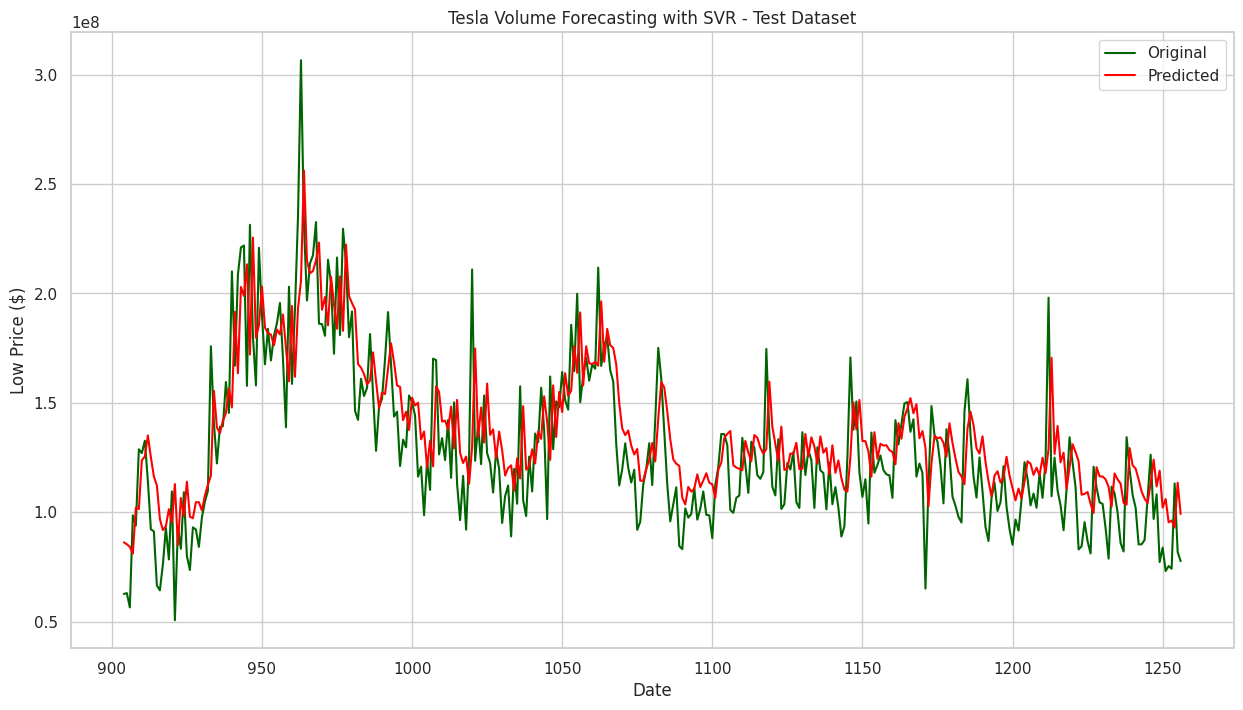

In [ ]:
#Plotting actual vs predicted for test set
y_test_inv = y_test_inv.flatten()

x_values = data.index[TIME_STEPS+len(train_pred_inv)+TIME_STEPS-1 : TIME_STEPS+len(train_pred_inv)+TIME_STEPS-1 + len(y_test_inv)]

plt.figure(figsize=(15, 8))
plt.plot(x_values, y_test_inv, label='Original', color='darkgreen')
plt.plot(x_values, test_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Low Price ($)')
plt.title('Tesla Volume Forecasting with SVR - Test Dataset')
plt.legend()
plt.show()

### *Method 3: Time Series Regression using Extreme Gradient Boosting*

In [ ]:
data.head()

Date       Open       High        Low      Close  Adj Close  \
0  01/04/2019  18.841333  19.280001  18.752001  19.278667  19.278667   
1  02/04/2019  19.219999  19.296000  18.925333  19.058666  19.058666   
2  03/04/2019  19.154667  19.744667  19.144667  19.454000  19.454000   
3  04/04/2019  17.459333  18.080000  17.372667  17.851999  17.851999   
4  05/04/2019  17.990667  18.406668  17.740667  18.330667  18.330667   

      Volume  
0  121656000  
1   82183500  
2  118791000  
3  355810500  
4  195574500

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [ ]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df = data.copy()

In [ ]:
# create 5 year moving average
df['MA5'] = df['Open'].rolling(2).mean()
# plot the df and MA
import plotly.express as px
fig = px.line(df, x="Date", y=["Open", "MA5"], template = 'plotly_dark')
fig.show()

In [ ]:
# create a sequence of numbers
df['Series'] = np.arange(1,len(df)+1)
# drop unnecessary columns and re-arrange
df.drop(['Close','High','Low','Adj Close','Volume'],axis=1, inplace=True)
df = df[['Series','Date','Open','MA5']]
# check the head of the dfset
df.head()

Series        Date       Open        MA5
0       1  01/04/2019  18.841333        NaN
1       2  02/04/2019  19.219999  19.030666
2       3  03/04/2019  19.154667  19.187333
3       4  04/04/2019  17.459333  18.307000
4       5  05/04/2019  17.990667  17.725000

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Date'] = df['Date'].dt.strftime('%d%m%Y').astype(int)

In [ ]:
# split data into train-test set manually
train = df[:900]
test = df[900:]
# check shape
train.shape, test.shape

((900, 4), (358, 4))

In [ ]:
test.head()

Series      Date        Open         MA5
900     901  25102022  210.100006  207.960007
901     902  26102022  219.399994  214.750000
902     903  27102022  229.770004  224.584999
903     904  28102022  225.399994  227.584999
904     905  31102022  226.190002  225.794998

In [ ]:
# import the regression module
from pycaret.regression import *
# initialize setup
s = setup(data=train, test_data=test, target='Open', fold_strategy='timeseries', numeric_features=['Date', 'Series'], fold=3, transform_target=True, fold_shuffle=False, data_split_shuffle=False, session_id=123)

In [ ]:
best = create_model('xgboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
prediction_holdout = predict_model(best);

In [ ]:
# generate predictions on the original dataset
predictions = predict_model(best, data=df)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2019-04-01', periods=len(predictions), freq = 'B')
# line plot
fig = px.line(predictions, x='Date', y=["Open","MA5"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2022-10-25", x1="2024-03-28", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

In [ ]:
final_best = finalize_model(best)

In [ ]:
future_dates = pd.date_range(start = '2024-03-28', end = '2028-03-31', freq = 'B')
future_df = pd.DataFrame()
future_df['Date'] = pd.date_range(start = '2024-03-28', end = '2028-03-31', freq = 'B')
future_df['Series'] = np.arange(2000,(2000+len(future_dates)))
future_df.head()

Date  Series
0 2024-03-28    2000
1 2024-03-29    2001
2 2024-04-01    2002
3 2024-04-02    2003
4 2024-04-03    2004

In [ ]:
future_df['MA5'] = df['Open'].rolling(2).mean()

In [ ]:
future_df['Date'] = future_df['Date'].dt.strftime('%d%m%Y').astype(int)

In [ ]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

Date  Series        MA5  prediction_label
0  28032024    2000        NaN         33.193295
1  29032024    2001  19.030666         31.855904
2   1042024    2002  19.187332         30.330271
3   2042024    2003  18.306999         29.985218
4   3042024    2004  17.725000         30.649155

In [ ]:
concat_df = pd.concat([df,predictions_future], axis=0)
concat_df_i = pd.date_range(start='2019-04-01', periods=len(concat_df), freq='B')
concat_df.set_index(concat_df_i, inplace=True)
fig = px.line(concat_df, x=concat_df.index, y=["Open", "prediction_label"], template = 'plotly_dark')
fig.show()

In [ ]:
df = data.copy()

Date       Open       High        Low      Close  Adj Close  \
0  01/04/2019  18.841333  19.280001  18.752001  19.278667  19.278667   
1  02/04/2019  19.219999  19.296000  18.925333  19.058666  19.058666   
2  03/04/2019  19.154667  19.744667  19.144667  19.454000  19.454000   
3  04/04/2019  17.459333  18.080000  17.372667  17.851999  17.851999   
4  05/04/2019  17.990667  18.406668  17.740667  18.330667  18.330667   

      Volume  
0  121656000  
1   82183500  
2  118791000  
3  355810500  
4  195574500

In [ ]:
# create 10 year moving average
df['MA5'] = df['Close'].rolling(2).mean()
# plot the data and MA
import plotly.express as px
fig = px.line(df, x="Date", y=["Close", "MA5"], template = 'plotly_dark')
fig.show()

In [ ]:
# create a sequence of numbers
df['Series'] = np.arange(1,len(df)+1)
# drop unnecessary columns and re-arrange
df.drop(['Open','High','Low','Adj Close','Volume'],axis=1, inplace=True)
df = df[['Series','Date','Close','MA5']]
# check the head of the dataset
df.head()

Series        Date      Close        MA5
0       1  01/04/2019  19.278667        NaN
1       2  02/04/2019  19.058666  19.168667
2       3  03/04/2019  19.454000  19.256333
3       4  04/04/2019  17.851999  18.652999
4       5  05/04/2019  18.330667  18.091333

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Date'] = df['Date'].dt.strftime('%d%m%Y').astype(int)

In [ ]:
# split data into train-test set manually
train = df[:900]
test = df[900:]
# check shape
train.shape, test.shape

((900, 4), (358, 4))

In [ ]:
# initialize setup
s = setup(data=train, test_data=test, target='Close', fold_strategy='timeseries', numeric_features=['Date', 'Series'], fold=3, transform_target=True, fold_shuffle=False, data_split_shuffle=False, session_id=123)

In [ ]:
best = create_model('xgboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
prediction_holdout = predict_model(best);

In [ ]:
# generate predictions on the original dataset
predictions = predict_model(best, data=df)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2019-04-01', periods=len(predictions), freq = 'B')
# predictions['year_ended'] = pd.date_range(start='2013-03-31', periods=len(predictions), freq='A')
# line plot
fig = px.line(predictions, x='Date', y=["Close","MA5"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2022-10-25", x1="2024-03-28", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

In [ ]:
final_best = finalize_model(best)

In [ ]:
future_dates = pd.date_range(start = '2024-03-28', end = '2028-03-31', freq = 'B')
future_df = pd.DataFrame()
future_df['Date'] = pd.date_range(start = '2024-03-28', end = '2028-03-31', freq = 'B')
future_df['Series'] = np.arange(2000,(2000+len(future_dates)))
future_df.head()

Date  Series
0 2024-03-28    2000
1 2024-03-29    2001
2 2024-04-01    2002
3 2024-04-02    2003
4 2024-04-03    2004

In [ ]:
future_df['MA5'] = df['Close'].rolling(2).mean()

In [ ]:
future_df['Date'] = future_df['Date'].dt.strftime('%Y%m%d').astype(int)

In [ ]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

Date  Series        MA5  prediction_label
0  20240328    2000        NaN         69.587196
1  20240329    2001  19.168667         54.003250
2  20240401    2002  19.256332         56.996407
3  20240402    2003  18.653000         54.003250
4  20240403    2004  18.091333         54.003250

In [ ]:
concat_df = pd.concat([df,predictions_future], axis=0)
concat_df_i = pd.date_range(start='2019-04-01', periods=len(concat_df), freq='B')
concat_df.set_index(concat_df_i, inplace=True)
fig = px.line(concat_df, x=concat_df.index, y=["Close", "prediction_label"], template = 'plotly_dark')
fig.show()

In [ ]:
df = data.copy()

Date       Open       High        Low      Close  Adj Close  \
0  01/04/2019  18.841333  19.280001  18.752001  19.278667  19.278667   
1  02/04/2019  19.219999  19.296000  18.925333  19.058666  19.058666   
2  03/04/2019  19.154667  19.744667  19.144667  19.454000  19.454000   
3  04/04/2019  17.459333  18.080000  17.372667  17.851999  17.851999   
4  05/04/2019  17.990667  18.406668  17.740667  18.330667  18.330667   

      Volume  
0  121656000  
1   82183500  
2  118791000  
3  355810500  
4  195574500

In [ ]:
# create 10 year moving average
df['MA5'] = df['High'].rolling(2).mean()
# plot the data and MA
import plotly.express as px
fig = px.line(df, x="Date", y=["High", "MA5"], template = 'plotly_dark')
fig.show()

In [ ]:
# create a sequence of numbers
df['Series'] = np.arange(1,len(df)+1)
# drop unnecessary columns and re-arrange
df.drop(['Open','Close','Low','Adj Close','Volume'],axis=1, inplace=True)
df = df[['Series','Date','High','MA5']]
# check the head of the dataset
df.head()

Series        Date       High        MA5
0       1  01/04/2019  19.280001        NaN
1       2  02/04/2019  19.296000  19.288000
2       3  03/04/2019  19.744667  19.520333
3       4  04/04/2019  18.080000  18.912333
4       5  05/04/2019  18.406668  18.243334

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df['Date'] = df['Date'].dt.strftime('%d%m%Y').astype(int)

In [ ]:
# split data into train-test set manually
train = df[:900]
test = df[900:]
# check shape
train.shape, test.shape

((900, 4), (358, 4))

In [ ]:
s = setup(data=train, test_data=test, target='High', fold_strategy='timeseries', numeric_features=['Date', 'Series'], fold=3, transform_target=True, fold_shuffle=False, data_split_shuffle=False, session_id=123)

In [ ]:
best = create_model('xgboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
prediction_holdout = predict_model(best);

In [ ]:
# generate predictions on the original dataset
predictions = predict_model(best, data=df)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2019-04-01', periods=len(predictions), freq = 'B')
# predictions['year_ended'] = pd.date_range(start='2013-03-31', periods=len(predictions), freq='A')
# line plot
fig = px.line(predictions, x='Date', y=["High","MA5"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2022-10-25", x1="2024-03-28", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

In [ ]:
final_best = finalize_model(best)

In [ ]:
future_dates = pd.date_range(start = '2024-03-28', end = '2028-03-31', freq = 'B')
future_df = pd.DataFrame()
future_df['Date'] = pd.date_range(start = '2024-03-28', end = '2028-03-31', freq = 'B')
future_df['Series'] = np.arange(2000,(2000+len(future_dates)))
future_df.head()

Date  Series
0 2024-03-28    2000
1 2024-03-29    2001
2 2024-04-01    2002
3 2024-04-02    2003
4 2024-04-03    2004

In [ ]:
future_df['MA5'] = df['High'].rolling(2).mean()

In [ ]:
future_df['Date'] = future_df['Date'].dt.strftime('%Y%m%d').astype(int)

In [ ]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

Date  Series        MA5  prediction_label
0  20240328    2000        NaN         42.614838
1  20240329    2001  19.288000         39.015686
2  20240401    2002  19.520334         39.894749
3  20240402    2003  18.912334         39.015686
4  20240403    2004  18.243334         38.880074

In [ ]:
concat_df = pd.concat([df,predictions_future], axis=0)
concat_df_i = pd.date_range(start='2019-04-01', periods=len(concat_df), freq='B')
concat_df.set_index(concat_df_i, inplace=True)
fig = px.line(concat_df, x=concat_df.index, y=["High", "prediction_label"], template = 'plotly_dark')
fig.show()

In [ ]:
df = data.copy()

Date       Open       High        Low      Close  Adj Close  \
0  01/04/2019  18.841333  19.280001  18.752001  19.278667  19.278667   
1  02/04/2019  19.219999  19.296000  18.925333  19.058666  19.058666   
2  03/04/2019  19.154667  19.744667  19.144667  19.454000  19.454000   
3  04/04/2019  17.459333  18.080000  17.372667  17.851999  17.851999   
4  05/04/2019  17.990667  18.406668  17.740667  18.330667  18.330667   

      Volume  
0  121656000  
1   82183500  
2  118791000  
3  355810500  
4  195574500

In [ ]:
# create 10 year moving average
df['MA5'] = df['Low'].rolling(2).mean()
# plot the data and MA
import plotly.express as px
fig = px.line(df, x="Date", y=["Low", "MA5"], template = 'plotly_dark')
fig.show()

In [ ]:
# create a sequence of numbers
df['Series'] = np.arange(1,len(df)+1)
# drop unnecessary columns and re-arrange
df.drop(['Open','Close','High','Adj Close','Volume'],axis=1, inplace=True)
df = df[['Series','Date','Low','MA5']]
# check the head of the dataset
df.head()

Series        Date        Low        MA5
0       1  01/04/2019  18.752001        NaN
1       2  02/04/2019  18.925333  18.838667
2       3  03/04/2019  19.144667  19.035000
3       4  04/04/2019  17.372667  18.258667
4       5  05/04/2019  17.740667  17.556667

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df['Date'] = df['Date'].dt.strftime('%Y%m%d').astype(int)

In [ ]:
# split data into train-test set manually
train = df[:900]
test = df[900:]
# check shape
train.shape, test.shape

((900, 4), (358, 4))

In [ ]:
s = setup(data=train, test_data=test, target='Low', fold_strategy='timeseries', numeric_features=['Date', 'Series'], fold=3, transform_target=True, fold_shuffle=False, data_split_shuffle=False, session_id=123)

In [ ]:
best = create_model('xgboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
prediction_holdout = predict_model(best);

In [ ]:
# generate predictions on the original dataset
predictions = predict_model(best, data=df)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2019-04-01', periods=len(predictions), freq = 'B')
# line plot
fig = px.line(predictions, x='Date', y=["Low","MA5"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2022-10-25", x1="2024-03-28", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

In [ ]:
final_best = finalize_model(best)

In [ ]:
future_dates = pd.date_range(start = '2024-03-28', end = '2028-03-31', freq = 'B')
future_df = pd.DataFrame()
future_df['Date'] = pd.date_range(start = '2024-03-28', end = '2028-03-31', freq = 'B')
future_df['Series'] = np.arange(2000,(2000+len(future_dates)))
future_df.head()

Date  Series
0 2024-03-28    2000
1 2024-03-29    2001
2 2024-04-01    2002
3 2024-04-02    2003
4 2024-04-03    2004

In [ ]:
future_df['MA5'] = df['Low'].rolling(2).mean()

In [ ]:
future_df['Date'] = future_df['Date'].dt.strftime('%Y%m%d').astype(int)

In [ ]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

Date  Series        MA5  prediction_label
0  20240328    2000        NaN         48.956184
1  20240329    2001  18.838667         40.455269
2  20240401    2002  19.035000         42.321239
3  20240402    2003  18.258667         40.455269
4  20240403    2004  17.556667         40.059422

In [ ]:
concat_df = pd.concat([df,predictions_future], axis=0)
concat_df_i = pd.date_range(start='2019-04-01', periods=len(concat_df), freq='B')
concat_df.set_index(concat_df_i, inplace=True)
fig = px.line(concat_df, x=concat_df.index, y=["Low", "prediction_label"], template = 'plotly_dark')
fig.show()

In [ ]:
df = data.copy()

Date       Open       High        Low      Close  Adj Close  \
0  01/04/2019  18.841333  19.280001  18.752001  19.278667  19.278667   
1  02/04/2019  19.219999  19.296000  18.925333  19.058666  19.058666   
2  03/04/2019  19.154667  19.744667  19.144667  19.454000  19.454000   
3  04/04/2019  17.459333  18.080000  17.372667  17.851999  17.851999   
4  05/04/2019  17.990667  18.406668  17.740667  18.330667  18.330667   

      Volume  
0  121656000  
1   82183500  
2  118791000  
3  355810500  
4  195574500

In [ ]:
# create 5 year moving average
df['MA5'] = df['Volume'].rolling(2).mean()
# plot the data and MA
import plotly.express as px
fig = px.line(df, x="Date", y=["Volume", "MA5"], template = 'plotly_dark')
fig.show()

In [ ]:
# create a sequence of numbers
df['Series'] = np.arange(1,len(df)+1)
# drop unnecessary columns and re-arrange
df.drop(['Open','Close','High','Low','Adj Close'],axis=1, inplace=True)
df = df[['Series','Date','Volume','MA5']]
# check the head of the dataset
df.head()

Series        Date     Volume          MA5
0       1  01/04/2019  121656000          NaN
1       2  02/04/2019   82183500  101919750.0
2       3  03/04/2019  118791000  100487250.0
3       4  04/04/2019  355810500  237300750.0
4       5  05/04/2019  195574500  275692500.0

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df['Date'] = df['Date'].dt.strftime('%Y%m%d').astype(int)

In [ ]:
# split data into train-test set manually
train = df[:900]
test = df[900:]
# check shape
train.shape, test.shape

((900, 4), (358, 4))

In [ ]:
s = setup(data=train, test_data=test, target='Volume', fold_strategy='timeseries', numeric_features=['Date', 'Series'], fold=3, transform_target=True, fold_shuffle=False, data_split_shuffle=False, session_id=123)

In [ ]:
best = create_model('xgboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
prediction_holdout = predict_model(best);

In [ ]:
# generate predictions on the original dataset
predictions = predict_model(best, data=df)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2019-04-01', periods=len(predictions), freq = 'B')
# line plot
fig = px.line(predictions, x='Date', y=["Volume","MA5"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2022-10-25", x1="2024-03-28", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

In [ ]:
final_best = finalize_model(best)

In [ ]:
future_dates = pd.date_range(start = '2024-03-28', end = '2028-03-31', freq = 'B')
future_df = pd.DataFrame()
future_df['Date'] = pd.date_range(start = '2024-03-28', end = '2028-03-31', freq = 'B')
future_df['Series'] = np.arange(2000,(2000+len(future_dates)))
future_df.head()

Date  Series
0 2024-03-28    2000
1 2024-03-29    2001
2 2024-04-01    2002
3 2024-04-02    2003
4 2024-04-03    2004

In [ ]:
future_df['MA5'] = df['Volume'].rolling(2).mean()

In [ ]:
future_df['Date'] = future_df['Date'].dt.strftime('%Y%m%d').astype(int)

In [ ]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

Date  Series          MA5  prediction_label
0  20240328    2000          NaN       122331488.0
1  20240329    2001  101919752.0       100423288.0
2  20240401    2002  100487248.0       100423288.0
3  20240402    2003  237300752.0       239335824.0
4  20240403    2004  275692512.0       261983376.0

In [ ]:
concat_df = pd.concat([df,predictions_future], axis=0)
concat_df_i = pd.date_range(start='2019-04-01', periods=len(concat_df), freq='B')
concat_df.set_index(concat_df_i, inplace=True)
fig = px.line(concat_df, x=concat_df.index, y=["Volume", "prediction_label"], template = 'plotly_dark')
fig.show()

### *Method 4: Vector Autoregression*

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)
df.index = pd.date_range(start='2019-04-01', periods=len(df), freq='B')

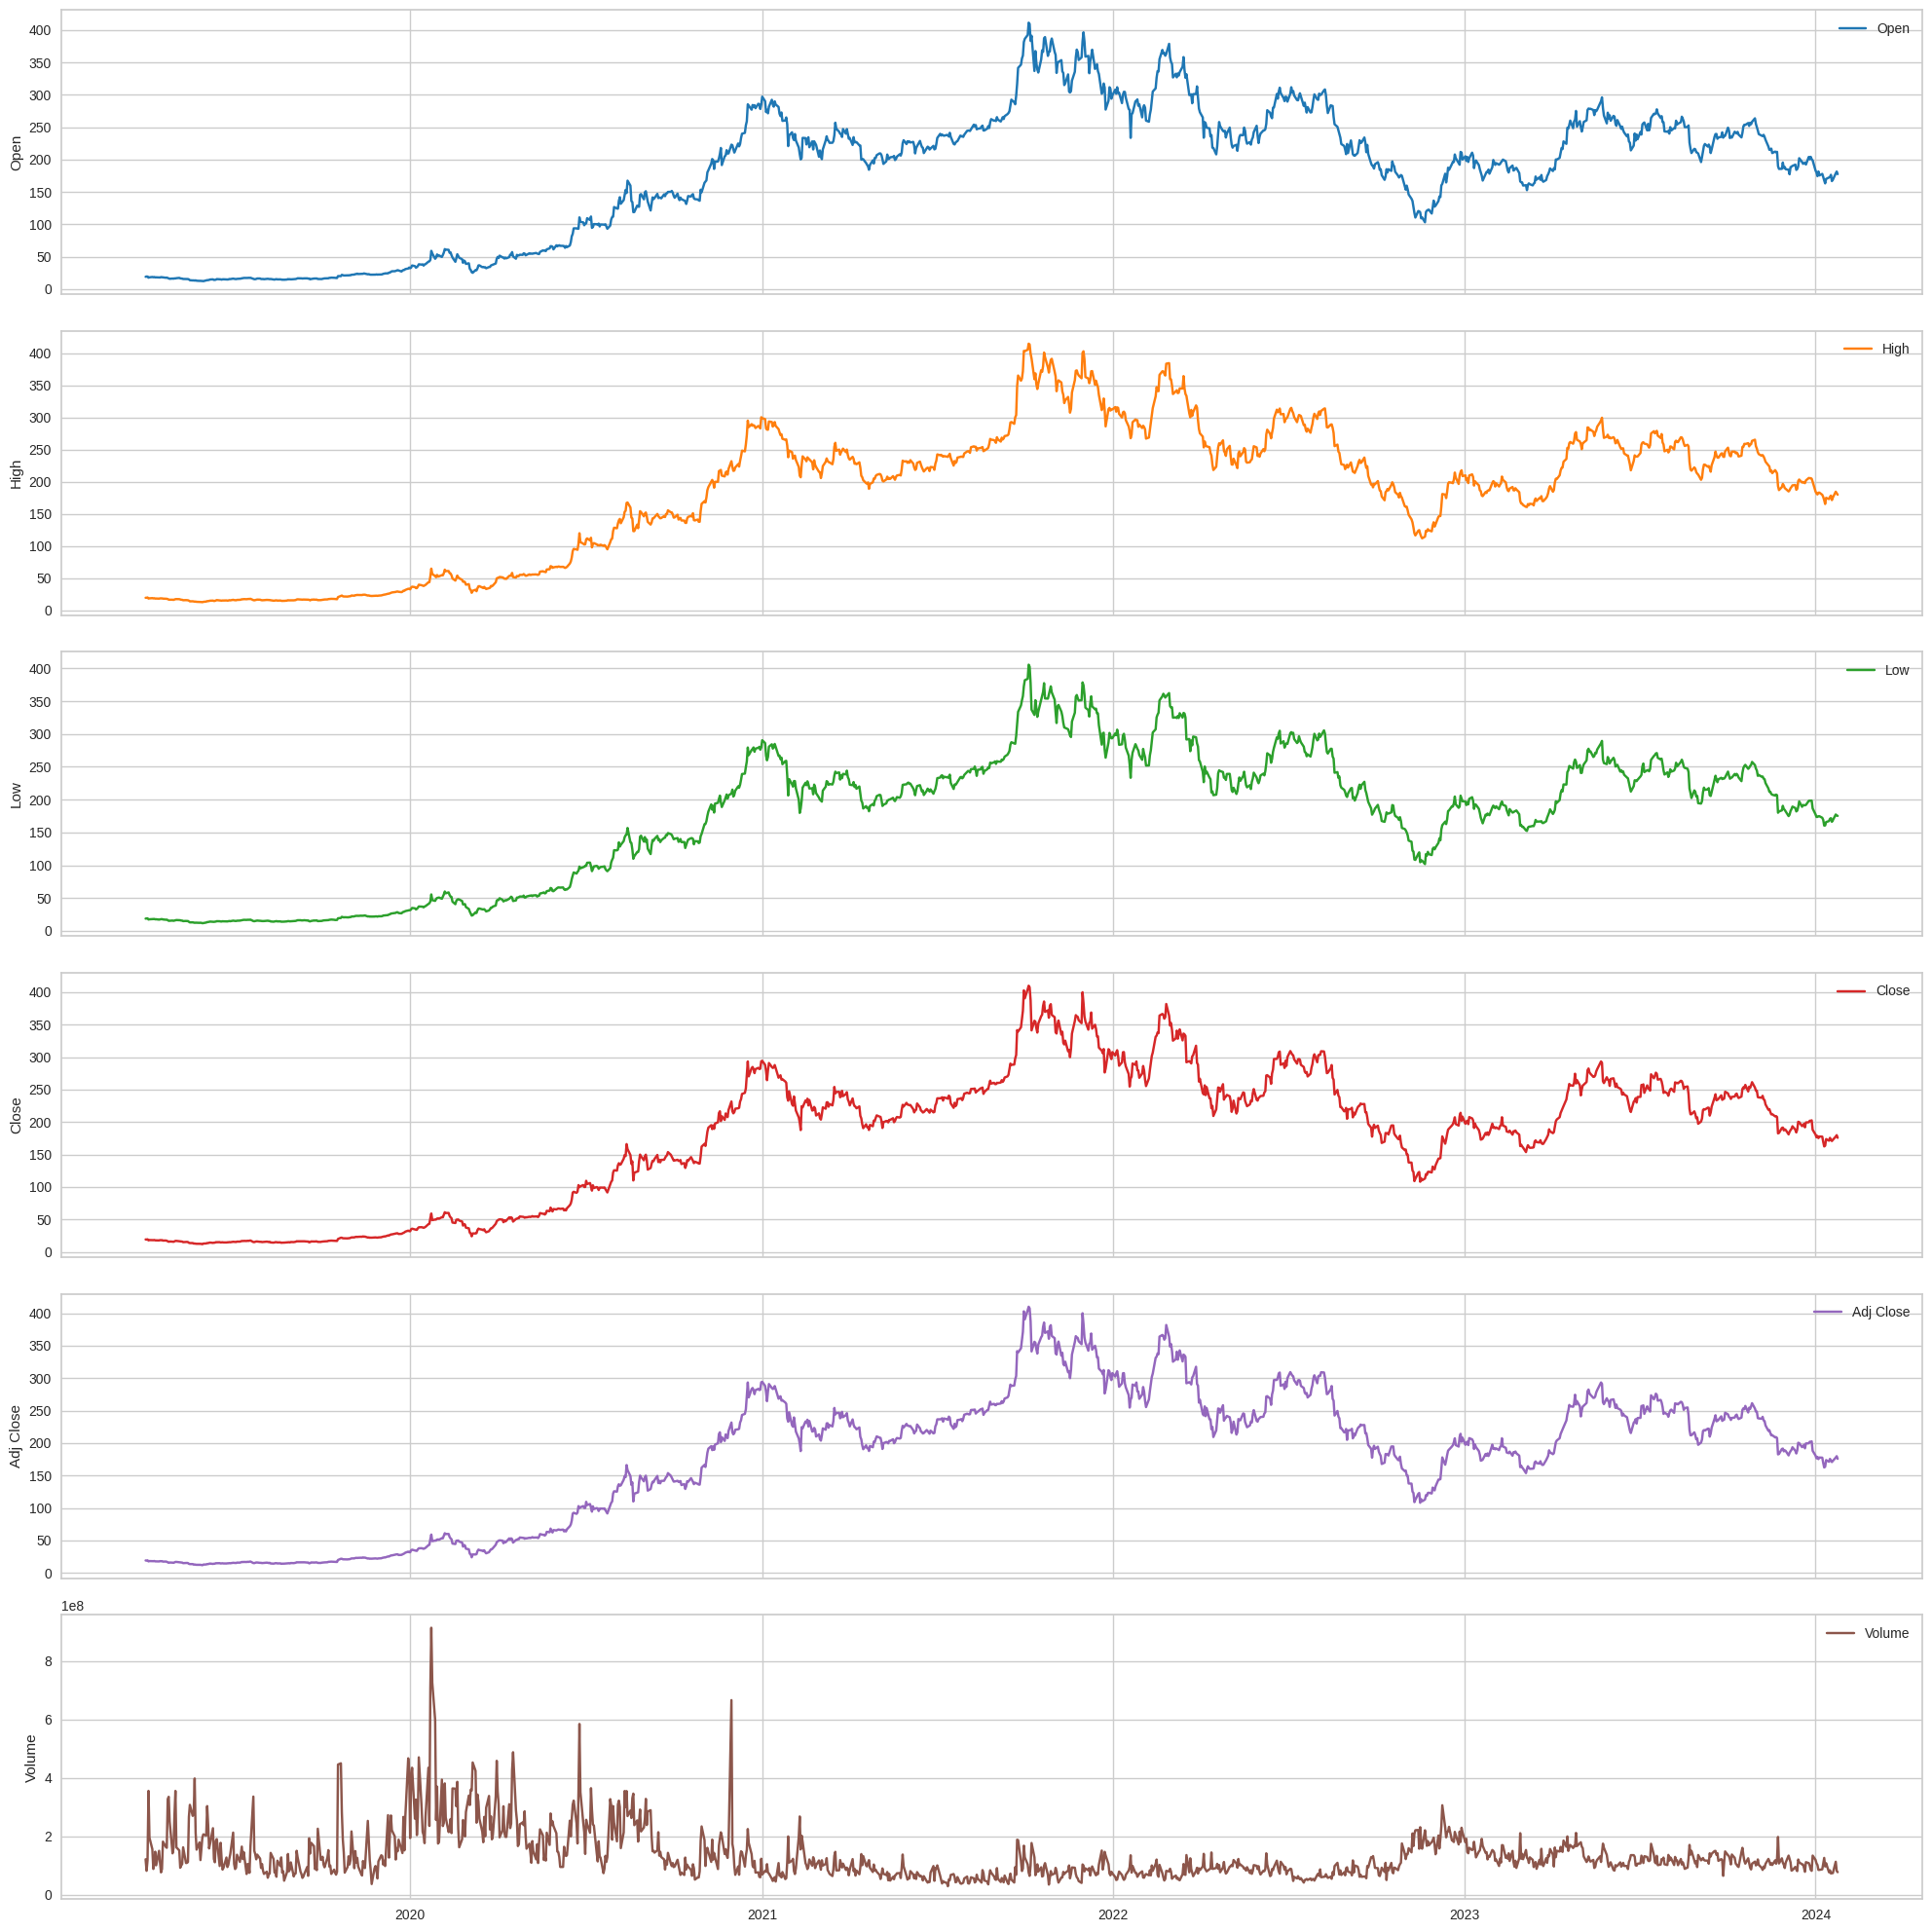

In [ ]:
#plotting the data features together
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(20, 20), sharex=True)

#different colours to differentiate between the features being plotted
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b']

# Plot each column in a separate subplot
for i, column in enumerate(df.columns):
    axes[i].plot(df.index, df[column], label=column, color=colors[i % len(colors)])
    # axes[i].set_xlabel('Date')
    axes[i].set_ylabel(column)
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Augmented Dickey-Fuller Test on all the columns

def adf_test(series, columns):
  result = adfuller(series)
  print(f'-- ADF Test for {columns} --')
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical values:')
  for key, value in result[4].items():
    print(f'\t{key}: {value:.2f}')
  if result[1] <= 0.05:
    print(f"Stationary\n")
  else:
    print(f"Non-Stationary\n")

for column in df.columns:
  adf_test(df[column], column)

-- ADF Test for Open --
ADF Statistic: -1.886450
p-value: 0.338462
Critical values:
	1%: -3.44
	5%: -2.86
	10%: -2.57
Non-Stationary

-- ADF Test for High --
ADF Statistic: -1.828602
p-value: 0.366357
Critical values:
	1%: -3.44
	5%: -2.86
	10%: -2.57
Non-Stationary

-- ADF Test for Low --
ADF Statistic: -1.901437
p-value: 0.331385
Critical values:
	1%: -3.44
	5%: -2.86
	10%: -2.57
Non-Stationary

-- ADF Test for Close --
ADF Statistic: -1.971540
p-value: 0.299190
Critical values:
	1%: -3.44
	5%: -2.86
	10%: -2.57
Non-Stationary

-- ADF Test for Adj Close --
ADF Statistic: -1.971540
p-value: 0.299190
Critical values:
	1%: -3.44
	5%: -2.86
	10%: -2.57
Non-Stationary

-- ADF Test for Volume --
ADF Statistic: -3.162232
p-value: 0.022278
Critical values:
	1%: -3.44
	5%: -2.86
	10%: -2.57
Stationary



In [ ]:
#Handling non-stationary time series data for VAR modelling

from statsmodels.tsa.holtwinters import Holt

open_price = df['Open']
high_price = df['High']
low_price = df['Low']
close_price = df['Close']
adjclose_price = df['Adj Close']
volume = df['Volume']

open_price_model = Holt(df['Open'])
open_price_results = open_price_model.fit(smoothing_level=0.1)
open_price_trend = open_price_results.fittedvalues
open_price_level = open_price_results.level
open_price_residual = df['Open'] - open_price_trend

high_price_model = Holt(df['High'])
high_price_results = high_price_model.fit(smoothing_level=0.1)
high_price_trend = high_price_results.fittedvalues
high_price_level = high_price_results.level
high_price_residual = df['High'] - high_price_trend

low_price_model = Holt(df['Low'])
low_price_results = low_price_model.fit(smoothing_level=0.1)
low_price_trend = low_price_results.fittedvalues
low_price_level = low_price_results.level
low_price_residual = df['Low'] - low_price_trend

close_price_model = Holt(df['Close'])
close_price_results = close_price_model.fit(smoothing_level=0.1)
close_price_trend = close_price_results.fittedvalues
close_price_level = close_price_results.level
close_price_residual = df['Close'] - close_price_trend

adjclose_price_model = Holt(df['Adj Close'])
adjclose_price_results = adjclose_price_model.fit(smoothing_level=0.1)
adjclose_price_trend = adjclose_price_results.fittedvalues
adjclose_price_level = adjclose_price_results.level
adjclose_price_residual = df['Adj Close'] - adjclose_price_trend

volume_model = Holt(df['Volume'])
volume_results = volume_model.fit(smoothing_level=0.1)
volume_trend = volume_results.fittedvalues
volume_level = volume_results.level
volume_residual = df['Volume'] - volume_trend

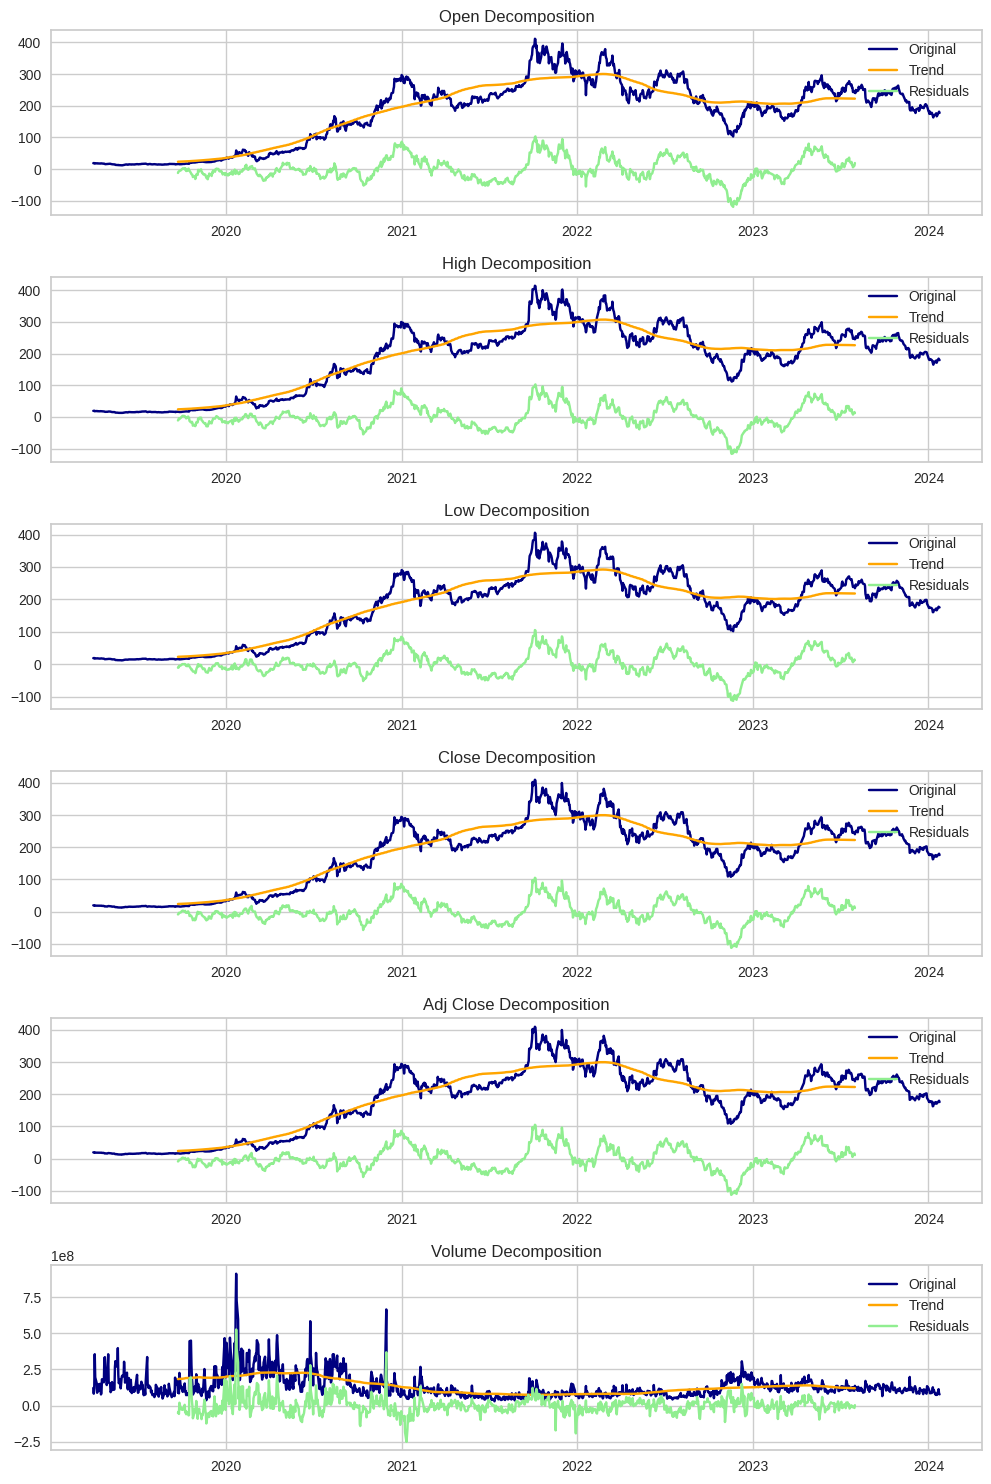

In [ ]:
#Checking for decomposition in the components using Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10,15))

#Performing decomposition
for i, column in enumerate(columns):
  decomposition = seasonal_decompose(df[column], model='additive', period=252)
  #plotting original, trend, and residuals
  axes[i].plot(df.index,df[column], label='Original', color='navy')
  axes[i].plot(decomposition.trend, label='Trend', color='orange')
  axes[i].plot(decomposition.resid, label='Residuals', color='lightgreen')

  axes[i].set_title(f'{column.replace("_", " ").title()} Decomposition')
  axes[i].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_for_var = pd.concat([df[['High', 'Low', 'Close', 'Volume']],
                          open_price_residual], axis=1, join='inner')

# Calculate VIF to check for multicollinearity
vif_data = pd.DataFrame()
vif_data["Variable"] = data_for_var.columns
vif_data["VIF"] = [variance_inflation_factor(data_for_var.values, i) for i in range(data_for_var.shape[1])]
print(vif_data)



model = VAR(data_for_var)

lag_results = model.select_order(maxlags=10)
print(lag_results.summary())

  Variable          VIF
0     High  2887.090495
1      Low  3333.041432
2    Close  3207.897551
3   Volume     1.701882
4        0     1.053323
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        56.70       56.72   4.209e+24       56.71
1        46.56       46.68   1.664e+20       46.61
2        46.11       46.33   1.058e+20       46.19
3        45.94      46.27*   8.949e+19       46.06
4        45.88       46.31   8.432e+19       46.04
5        45.83       46.36   7.993e+19      46.03*
6        45.84       46.48   8.086e+19       46.08
7        45.85       46.59   8.169e+19       46.13
8        45.85       46.70   8.197e+19       46.17
9       45.82*       46.76  7.926e+19*       46.17
10       45.83       46.88   8.021e+19       46.22
--------------------------------------------------


In [ ]:
# Assuming 'data_for_var' contains the relevant time series data
model = VAR(data_for_var)

# Fitting the model with the chosen lag order
model_fitted = model.fit(2, ic='aic', trend='ct')

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Compute Durbin-Watson statistics
dw_stats = durbin_watson(model_fitted.resid)

for col, stat in zip(data_for_var.columns, dw_stats):
    print(f'{col}: {stat}')

High: 2.0016154525777385
Low: 1.9992005560258281
Close: 1.9945968399911371
Volume: 2.0263762122497817
0: 2.232498634495693


In [ ]:
print(data_for_var.columns)

Index(['High', 'Low', 'Close', 'Volume', 0], dtype='object')


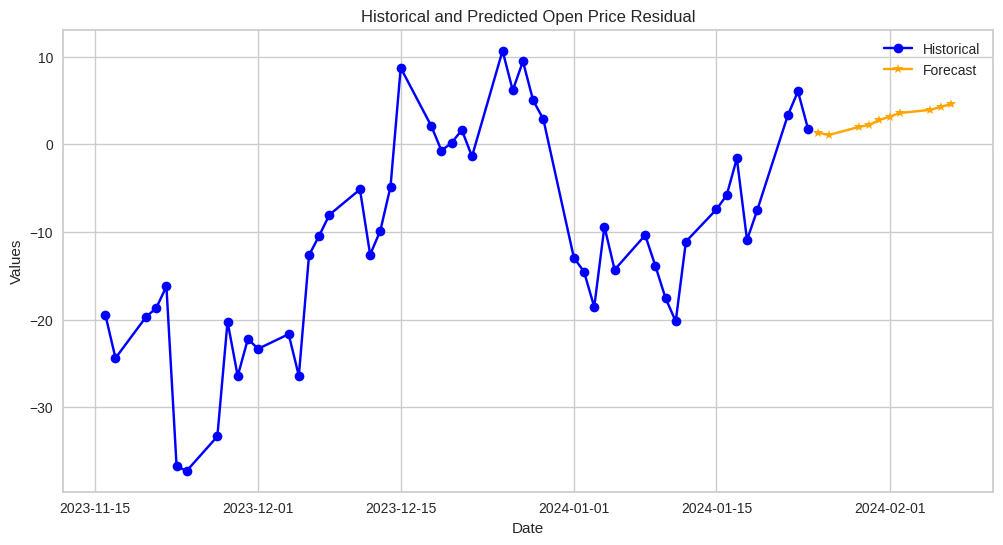

In [ ]:
# Forecasting
forecast_steps = 10  # Number of steps to forecast ahead
forecast = model_fitted.forecast(model_fitted.endog, steps=forecast_steps)

forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=data_for_var.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B'), columns=data_for_var.columns)

# Concatenate the predicted and last 50 observations of historical data for 'open_price_residual'
concatenated_data = pd.concat([data_for_var[0].tail(50), forecast_df[0]])

# Plot the concatenated data
plt.figure(figsize=(12, 6))
plt.plot(data_for_var.index[-50:], data_for_var[0].tail(50), label='Historical', color='blue',marker = 'o')
plt.plot(forecast_df.index, forecast_df[0], label='Forecast', color='orange',marker = '*')
plt.title('Historical and Predicted Open Price Residual')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

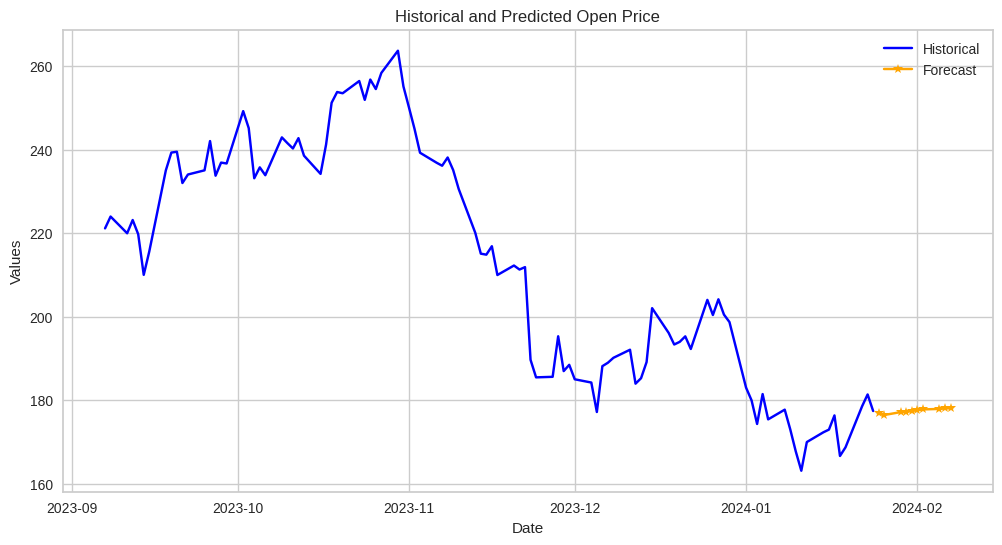

In [ ]:
open_price = df['Open']

# the fitted Holt model
open_price_model = Holt(df['Open'])
open_price_results = open_price_model.fit(smoothing_level=0.1)
open_price_trend = open_price_results.fittedvalues
open_price_level = open_price_results.level
open_price_residual = df['Open'] - open_price_trend


# Forecasting the trend component
forecast_steps = 10  # Number of steps to forecast ahead

# Forecasting future trend values
open_price_trend_forecast = open_price_results.forecast(steps=forecast_steps)

# Creating a date range for the forecast
open_price_trend_forecast_index = pd.date_range(start=open_price_trend.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

# Creating a DataFrame for the forecasted trend
open_price_trend_forecast_df = pd.DataFrame(open_price_trend_forecast, index=open_price_trend_forecast_index, columns=['open_price_trend_forecast'])

# sum the predicted trend and predicted residual values to get the final forecast
forecast_df['open_price_residual_final'] = forecast_df[0] + open_price_trend_forecast_df['open_price_trend_forecast']


# Plotting the final forecast of original open_price
plt.figure(figsize=(12, 6))
plt.plot(open_price[-100:], label='Historical', color='blue')
plt.plot(forecast_df.index, forecast_df['open_price_residual_final'], label='Forecast', color='orange', marker='*')
plt.title('Historical and Predicted Open Price')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Get the historical open prices for the last 10 days for comparison
actual_values = open_price[-10:]

# Get the corresponding forecasted open prices
predicted_values = forecast_df['open_price_residual_final']

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 48.98669967128439


In [ ]:
data_for_var = pd.concat([df[['Open', 'Low', 'Close', 'Volume']],
                          high_price_residual], axis=1, join='inner')

# Calculate VIF to check for multicollinearity
vif_data = pd.DataFrame()
vif_data["Variable"] = data_for_var.columns
vif_data["VIF"] = [variance_inflation_factor(data_for_var.values, i) for i in range(data_for_var.shape[1])]
print(vif_data)



model = VAR(data_for_var)

lag_results = model.select_order(maxlags=10)
print(lag_results.summary())

  Variable          VIF
0     Open  2237.599889
1      Low  5555.507802
2    Close  2568.988559
3   Volume     1.689662
4        0     1.076379
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        56.98       57.00   5.580e+24       56.99
1        46.27       46.39   1.238e+20       46.31
2        46.02       46.25   9.732e+19       46.11
3        45.91      46.24*   8.677e+19       46.03
4        45.84       46.27   8.074e+19       46.00
5        45.79       46.33   7.733e+19      46.00*
6        45.80       46.44   7.813e+19       46.04
7        45.81       46.55   7.854e+19       46.09
8        45.81       46.66   7.876e+19       46.13
9       45.79*       46.74  7.729e+19*       46.15
10       45.82       46.86   7.907e+19       46.21
--------------------------------------------------


In [ ]:
# Assuming 'data_for_var' contains the relevant time series data
model = VAR(data_for_var)

# Fitting the model with the chosen lag order
model_fitted = model.fit(2, ic='aic', trend='ct')

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Compute Durbin-Watson statistics
dw_stats = durbin_watson(model_fitted.resid)

for col, stat in zip(data_for_var.columns, dw_stats):
    print(f'{col}: {stat}')

Open: 2.0047479112601803
Low: 2.004401954904978
Close: 1.9940777553064801
Volume: 2.0254160289201932
0: 2.0528700321145648


In [ ]:
print(data_for_var.columns)
print(forecast_df.columns)

Index(['Open', 'Low', 'Close', 'Volume', 0], dtype='object')
Index(['High', 'Low', 'Close', 'Volume', 0, 'open_price_residual_final'], dtype='object')


In [ ]:
forecast_df = pd.concat([df[['Open', 'Low', 'Close', 'Volume']],
                          high_price_residual], axis=1, join='inner')

In [ ]:
print(data_for_var.columns)
print(forecast_df.columns)

Index(['Open', 'Low', 'Close', 'Volume', 0], dtype='object')
Index(['Open', 'Low', 'Close', 'Volume', 0], dtype='object')


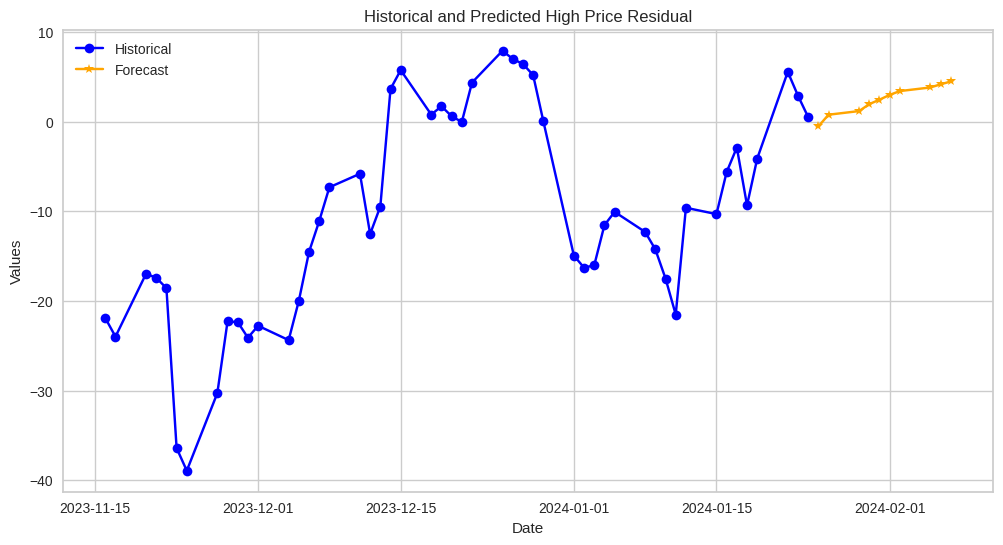

In [ ]:
# Forecasting
forecast_steps = 10  # Number of steps to forecast ahead
forecast = model_fitted.forecast(model_fitted.endog, steps=forecast_steps)

forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=data_for_var.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B'), columns=data_for_var.columns)

# Concatenate the predicted and last 50 observations of historical data for 'high_price_residual'
concatenated_data = pd.concat([data_for_var[0].tail(50), forecast_df[0]])

# Plot the concatenated data
plt.figure(figsize=(12, 6))
plt.plot(data_for_var.index[-50:], data_for_var[0].tail(50), label='Historical', color='blue',marker = 'o')
plt.plot(forecast_df.index, forecast_df[0], label='Forecast', color='orange',marker = '*')
plt.title('Historical and Predicted High Price Residual')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

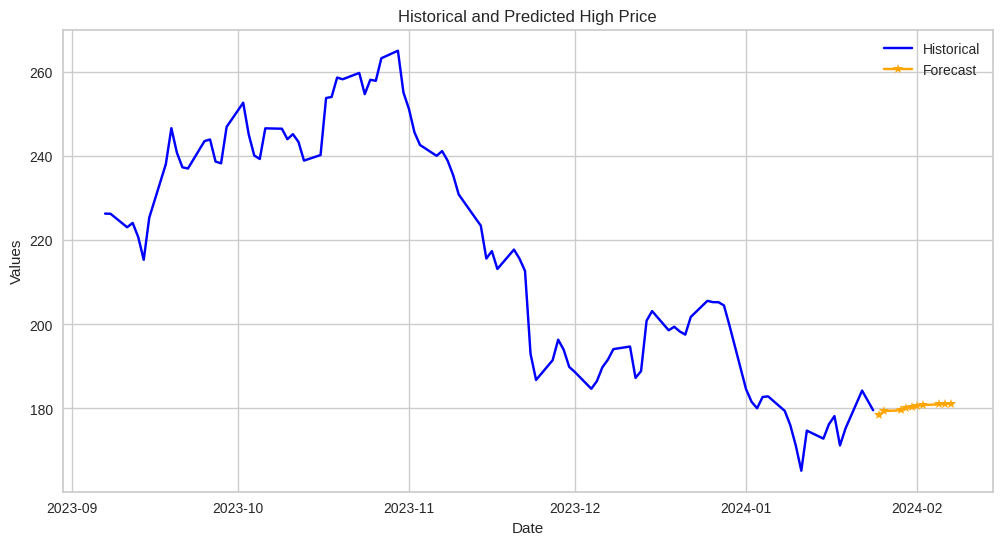

In [ ]:
high_price = df['High']

# the fitted Holt model
high_price_model = Holt(df['High'])
high_price_results = high_price_model.fit(smoothing_level=0.1)
high_price_trend = high_price_results.fittedvalues
high_price_level = high_price_results.level
high_price_residual = df['High'] - high_price_trend


# Forecasting the trend component
forecast_steps = 10  # Number of steps to forecast ahead

# Forecasting future trend values
high_price_trend_forecast = high_price_results.forecast(steps=forecast_steps)

# Creating a date range for the forecast
high_price_trend_forecast_index = pd.date_range(start=high_price_trend.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

# Creating a DataFrame for the forecasted trend
high_price_trend_forecast_df = pd.DataFrame(high_price_trend_forecast, index=high_price_trend_forecast_index, columns=['high_price_trend_forecast'])

# sum the predicted trend and predicted residual values to get the final forecast
forecast_df['high_price_residual_final'] = forecast_df[0] + high_price_trend_forecast_df['high_price_trend_forecast']


# Plotting the final forecast of original high_price
plt.figure(figsize=(12, 6))
plt.plot(high_price[-100:], label='Historical', color='blue')
plt.plot(forecast_df.index, forecast_df['high_price_residual_final'], label='Forecast', color='orange', marker='*')
plt.title('Historical and Predicted High Price')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Get the historical high prices for the last 10 days for comparison
actual_values = high_price[-10:]

# Get the corresponding forecasted low prices
predicted_values = forecast_df['high_price_residual_final']

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 39.33771270636573


In [ ]:
data_for_var = pd.concat([df[['Open', 'High', 'Close', 'Volume']],
                          low_price_residual], axis=1, join='inner')

# Calculate VIF to check for multicollinearity
vif_data = pd.DataFrame()
vif_data["Variable"] = data_for_var.columns
vif_data["VIF"] = [variance_inflation_factor(data_for_var.values, i) for i in range(data_for_var.shape[1])]
print(vif_data)

model = VAR(data_for_var)

lag_results = model.select_order(maxlags=10)
print(lag_results.summary())

  Variable          VIF
0     Open  3078.095630
1     High  7086.118151
2    Close  2497.085680
3   Volume     1.647839
4        0     1.062179
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        56.80       56.82   4.649e+24       56.81
1        46.23       46.35   1.196e+20       46.28
2        45.91       46.14   8.699e+19       46.00
3        45.81      46.14*   7.844e+19       45.93
4        45.75       46.18   7.366e+19       45.91
5        45.68       46.21   6.861e+19      45.88*
6        45.67       46.30   6.806e+19       45.91
7        45.65       46.39   6.696e+19       45.93
8        45.64       46.48   6.606e+19       45.95
9       45.63*       46.57  6.531e+19*       45.98
10       45.64       46.69   6.644e+19       46.04
--------------------------------------------------


In [ ]:
# Assuming 'data_for_var' contains the relevant time series data
model = VAR(data_for_var)

# Fitting the model with the chosen lag order
model_fitted = model.fit(2, ic='aic', trend='ct')

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Compute Durbin-Watson statistics
dw_stats = durbin_watson(model_fitted.resid)

for col, stat in zip(data_for_var.columns, dw_stats):
    print(f'{col}: {stat}')

Open: 2.0081721362193705
High: 2.0020264793018683
Close: 1.9950462663206823
Volume: 2.0284490201171845
0: 2.0616090902789286


In [ ]:
print(data_for_var.columns)
print(forecast_df.columns)

Index(['Open', 'High', 'Close', 'Volume', 0], dtype='object')
Index(['Open', 'Low', 'Close', 'Volume', 0, 'high_price_residual_final'], dtype='object')


In [ ]:
forecast_df = pd.concat([df[['Open', 'High', 'Close', 'Volume']],
                          low_price_residual], axis=1, join='inner')

In [ ]:
print(data_for_var.columns)
print(forecast_df.columns)

Index(['Open', 'High', 'Close', 'Volume', 0], dtype='object')
Index(['Open', 'High', 'Close', 'Volume', 0], dtype='object')


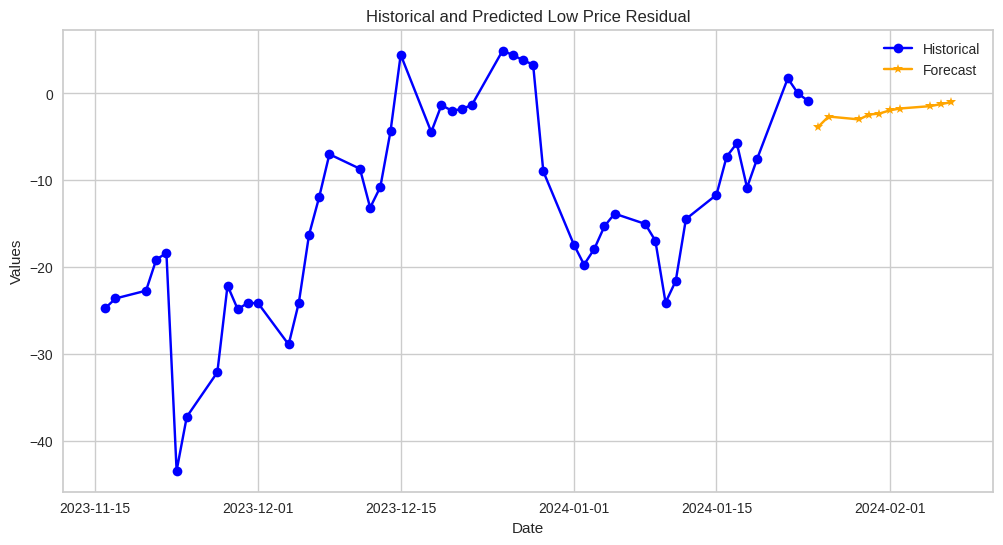

In [ ]:
# Forecasting
forecast_steps = 10  # Number of steps to forecast ahead
forecast = model_fitted.forecast(model_fitted.endog, steps=forecast_steps)

forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=data_for_var.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B'), columns=data_for_var.columns)

# Concatenate the predicted and last 50 observations of historical data for 'high_price_residual'
concatenated_data = pd.concat([data_for_var[0].tail(50), forecast_df[0]])

# Plot the concatenated data
plt.figure(figsize=(12, 6))
plt.plot(data_for_var.index[-50:], data_for_var[0].tail(50), label='Historical', color='blue',marker = 'o')
plt.plot(forecast_df.index, forecast_df[0], label='Forecast', color='orange',marker = '*')
plt.title('Historical and Predicted Low Price Residual')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

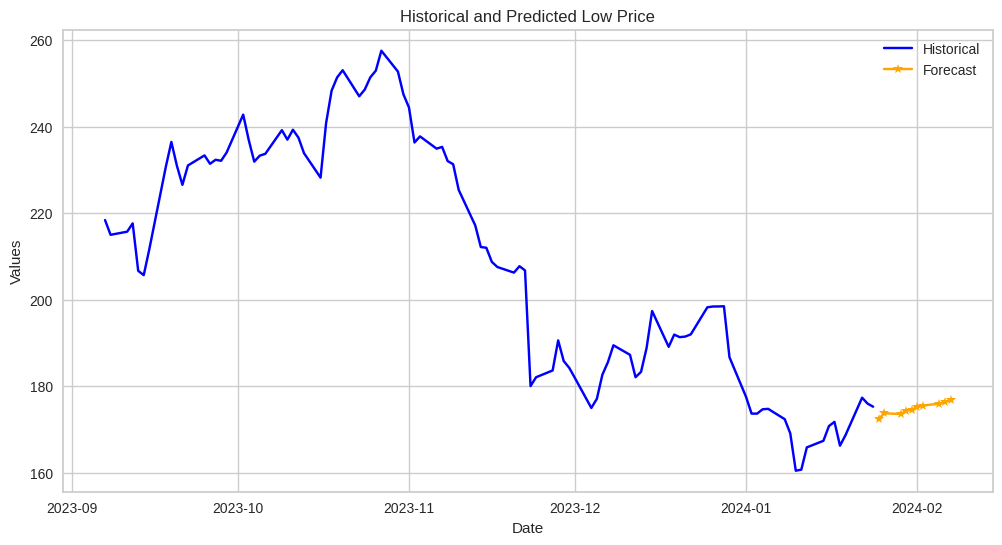

In [ ]:
low_price = df['Low']

# the fitted Holt model
low_price_model = Holt(df['Low'])
low_price_results = low_price_model.fit(smoothing_level=0.1)
low_price_trend = low_price_results.fittedvalues
low_price_level = low_price_results.level
low_price_residual = df['Low'] - low_price_trend


# Forecasting the trend component
forecast_steps = 10  # Number of steps to forecast ahead

# Forecasting future trend values
low_price_trend_forecast = low_price_results.forecast(steps=forecast_steps)

# Creating a date range for the forecast
low_price_trend_forecast_index = pd.date_range(start=low_price_trend.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

# Creating a DataFrame for the forecasted trend
low_price_trend_forecast_df = pd.DataFrame(low_price_trend_forecast, index=low_price_trend_forecast_index, columns=['low_price_trend_forecast'])

# sum the predicted trend and predicted residual values to get the final forecast
forecast_df['low_price_residual_final'] = forecast_df[0] + low_price_trend_forecast_df['low_price_trend_forecast']


# Plotting the final forecast of original low_price
plt.figure(figsize=(12, 6))
plt.plot(low_price[-100:], label='Historical', color='blue')
plt.plot(forecast_df.index, forecast_df['low_price_residual_final'], label='Forecast', color='orange', marker='*')
plt.title('Historical and Predicted Low Price')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Get the historical low prices for the last 10 days for comparison
actual_values = low_price[-10:]

# Get the corresponding forecasted low prices
predicted_values = forecast_df['low_price_residual_final']

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 38.657702447991895


In [ ]:
data_for_var = pd.concat([df[['Open', 'High', 'Low', 'Volume']],
                          close_price_residual], axis=1, join='inner')

# Calculate VIF to check for multicollinearity
vif_data = pd.DataFrame()
vif_data["Variable"] = data_for_var.columns
vif_data["VIF"] = [variance_inflation_factor(data_for_var.values, i) for i in range(data_for_var.shape[1])]
print(vif_data)

model = VAR(data_for_var)

lag_results = model.select_order(maxlags=10)
print(lag_results.summary())

  Variable          VIF
0     Open  3782.869723
1     High  3638.091688
2      Low  2999.101551
3   Volume     1.730431
4        0     1.210249
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        56.53       56.55   3.545e+24       56.54
1        46.60       46.72   1.729e+20       46.65
2        46.11       46.33   1.056e+20       46.19
3        45.93      46.26*   8.892e+19       46.06
4        45.86       46.29   8.272e+19       46.02
5        45.81       46.35   7.870e+19      46.01*
6        45.82       46.46   7.949e+19       46.06
7        45.83       46.57   7.986e+19       46.10
8        45.83       46.68   8.033e+19       46.15
9       45.81*       46.75  7.819e+19*       46.16
10       45.83       46.87   7.978e+19       46.22
--------------------------------------------------


In [ ]:
# Assuming 'data_for_var' contains the relevant time series data
model = VAR(data_for_var)

# Fitting the model with the chosen lag order
model_fitted = model.fit(2, ic='aic', trend='ct')

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Compute Durbin-Watson statistics
dw_stats = durbin_watson(model_fitted.resid)

for col, stat in zip(data_for_var.columns, dw_stats):
    print(f'{col}: {stat}')

Open: 2.1382061588113856
High: 2.08376009498751
Low: 2.089414135100722
Volume: 2.0281470401794204
0: 1.9941802486317843


In [ ]:
print(data_for_var.columns)
print(forecast_df.columns)

Index(['Open', 'High', 'Low', 'Volume', 0], dtype='object')
Index(['Open', 'High', 'Close', 'Volume', 0, 'low_price_residual_final'], dtype='object')


In [ ]:
forecast_df = pd.concat([df[['Open', 'High', 'Low', 'Volume']],
                          close_price_residual], axis=1, join='inner')

In [ ]:
print(data_for_var.columns)
print(forecast_df.columns)

Index(['Open', 'High', 'Low', 'Volume', 0], dtype='object')
Index(['Open', 'High', 'Low', 'Volume', 0], dtype='object')


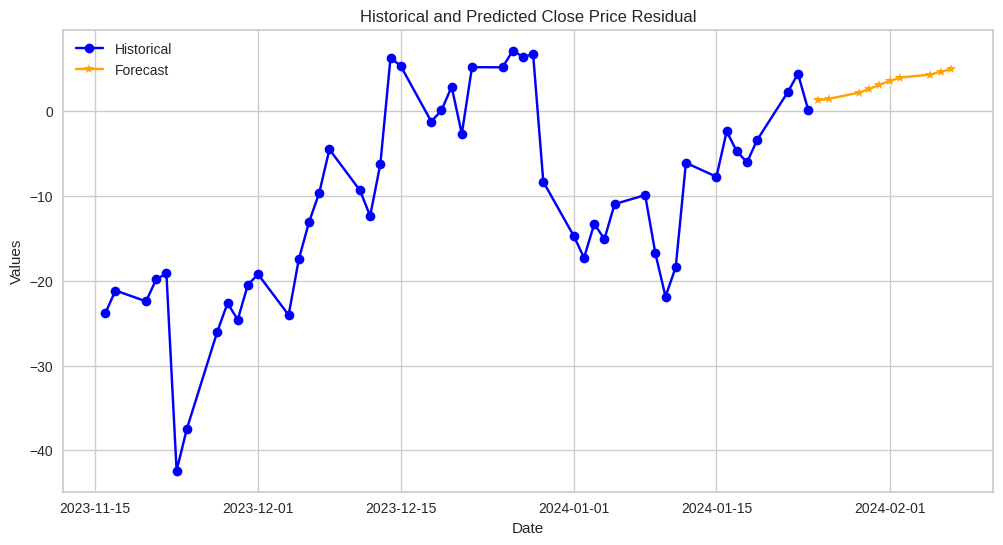

In [ ]:
# Forecasting
forecast_steps = 10  # Number of steps to forecast ahead
forecast = model_fitted.forecast(model_fitted.endog, steps=forecast_steps)

forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=data_for_var.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B'), columns=data_for_var.columns)

# Concatenate the predicted and last 50 observations of historical data for 'high_price_residual'
concatenated_data = pd.concat([data_for_var[0].tail(50), forecast_df[0]])

# Plot the concatenated data
plt.figure(figsize=(12, 6))
plt.plot(data_for_var.index[-50:], data_for_var[0].tail(50), label='Historical', color='blue',marker = 'o')
plt.plot(forecast_df.index, forecast_df[0], label='Forecast', color='orange',marker = '*')
plt.title('Historical and Predicted Close Price Residual')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

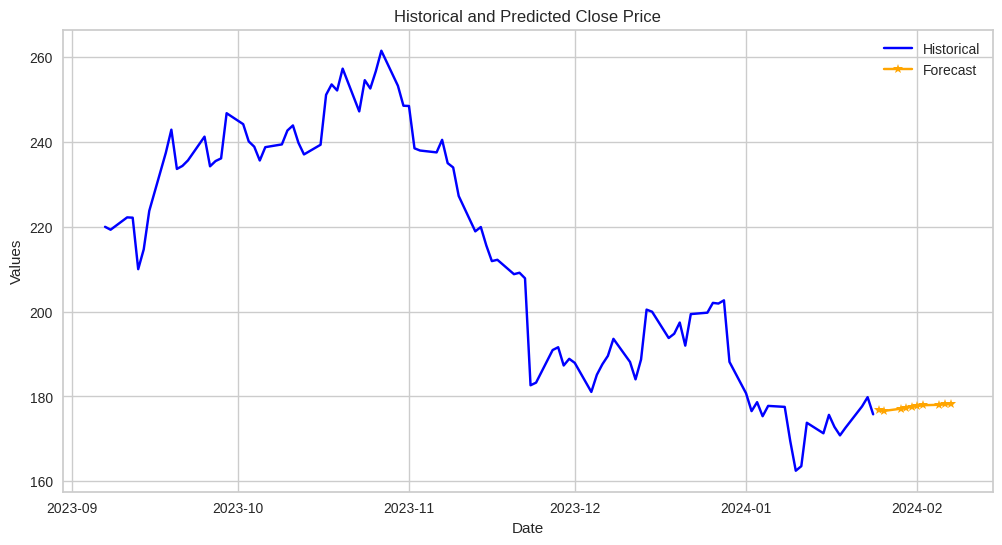

In [ ]:
close_price = df['Close']

# the fitted Holt model
close_price_model = Holt(df['Close'])
close_price_results = close_price_model.fit(smoothing_level=0.1)
close_price_trend = close_price_results.fittedvalues
close_price_level = close_price_results.level
close_price_residual = df['Close'] - close_price_trend


# Forecasting the trend component
forecast_steps = 10  # Number of steps to forecast ahead

# Forecasting future trend values
close_price_trend_forecast = close_price_results.forecast(steps=forecast_steps)

# Creating a date range for the forecast
close_price_trend_forecast_index = pd.date_range(start=close_price_trend.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

# Creating a DataFrame for the forecasted trend
close_price_trend_forecast_df = pd.DataFrame(close_price_trend_forecast, index=close_price_trend_forecast_index, columns=['close_price_trend_forecast'])

# sum the predicted trend and predicted residual values to get the final forecast
forecast_df['close_price_residual_final'] = forecast_df[0] + close_price_trend_forecast_df['close_price_trend_forecast']


# Plotting the final forecast of original close_price
plt.figure(figsize=(12, 6))
plt.plot(close_price[-100:], label='Historical', color='blue')
plt.plot(forecast_df.index, forecast_df['close_price_residual_final'], label='Forecast', color='orange', marker='*')
plt.title('Historical and Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Get the historical close prices for the last 10 days for comparison
actual_values = close_price[-10:]

# Get the corresponding forecasted close prices
predicted_values = forecast_df['close_price_residual_final']

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 32.342655967677985


In [ ]:
data_for_var = pd.concat([df[['Open', 'High', 'Low', 'Close']],
                          volume_residual], axis=1, join='inner')

# Calculate VIF to check for multicollinearity
vif_data = pd.DataFrame()
vif_data["Variable"] = data_for_var.columns
vif_data["VIF"] = [variance_inflation_factor(data_for_var.values, i) for i in range(data_for_var.shape[1])]
print(vif_data)

model = VAR(data_for_var)

lag_results = model.select_order(maxlags=10)
print(lag_results.summary())

  Variable          VIF
0     Open  5902.648030
1     High  7961.529524
2      Low  6160.406038
3    Close  5554.320897
4        0     1.092753
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        52.78       52.80   8.331e+22       52.78
1        45.68      45.81*   6.916e+19       45.73
2        45.63       45.86   6.574e+19      45.72*
3        45.61       45.94   6.425e+19       45.73
4        45.61       46.04   6.414e+19       45.77
5       45.59*       46.12  6.304e+19*       45.79
6        45.60       46.24   6.354e+19       45.84
7        45.62       46.35   6.463e+19       45.89
8        45.62       46.47   6.522e+19       45.94
9        45.62       46.56   6.471e+19       45.97
10       45.64       46.68   6.603e+19       46.03
--------------------------------------------------


In [ ]:
# Assuming 'data_for_var' contains the relevant time series data
model = VAR(data_for_var)

# Fitting the model with the chosen lag order
model_fitted = model.fit(2, ic='aic', trend='ct')

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Compute Durbin-Watson statistics
dw_stats = durbin_watson(model_fitted.resid)

for col, stat in zip(data_for_var.columns, dw_stats):
    print(f'{col}: {stat}')

Open: 2.005673009446647
High: 2.0031585741553224
Low: 2.0081751581360114
Close: 1.9935032524481544
0: 2.0066752842229474


In [ ]:
print(data_for_var.columns)
print(forecast_df.columns)

Index(['Open', 'High', 'Low', 'Close', 0], dtype='object')
Index(['Open', 'High', 'Low', 'Volume', 0, 'close_price_residual_final'], dtype='object')


In [ ]:
forecast_df = pd.concat([df[['Open', 'High', 'Low', 'Close']],
                          volume_residual], axis=1, join='inner')

In [ ]:
print(data_for_var.columns)
print(forecast_df.columns)

Index(['Open', 'High', 'Low', 'Close', 0], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 0], dtype='object')


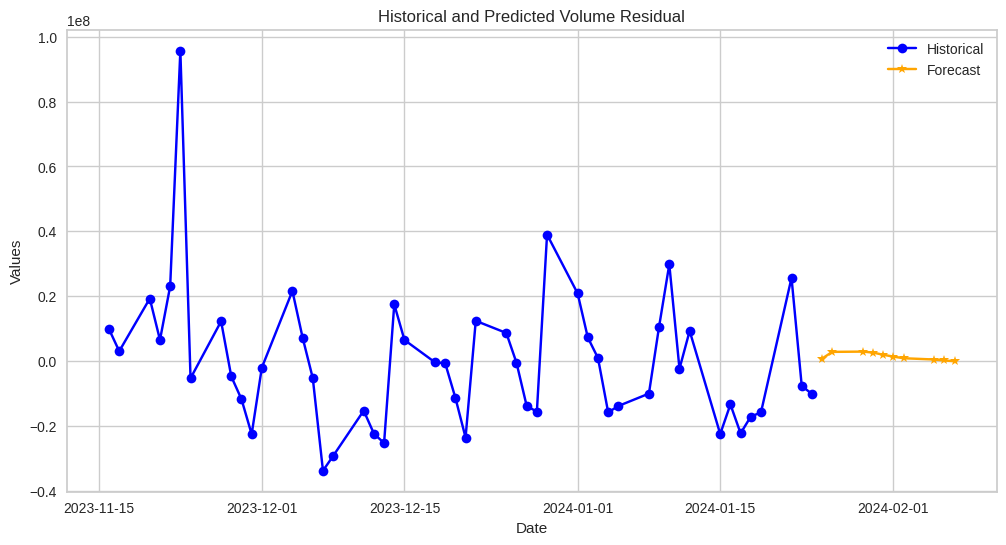

In [ ]:
# Forecasting
forecast_steps = 10  # Number of steps to forecast ahead
forecast = model_fitted.forecast(model_fitted.endog, steps=forecast_steps)

forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=data_for_var.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B'), columns=data_for_var.columns)

# Concatenate the predicted and last 50 observations of historical data for 'high_price_residual'
concatenated_data = pd.concat([data_for_var[0].tail(50), forecast_df[0]])

# Plot the concatenated data
plt.figure(figsize=(12, 6))
plt.plot(data_for_var.index[-50:], data_for_var[0].tail(50), label='Historical', color='blue',marker = 'o')
plt.plot(forecast_df.index, forecast_df[0], label='Forecast', color='orange',marker = '*')
plt.title('Historical and Predicted Volume Residual')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

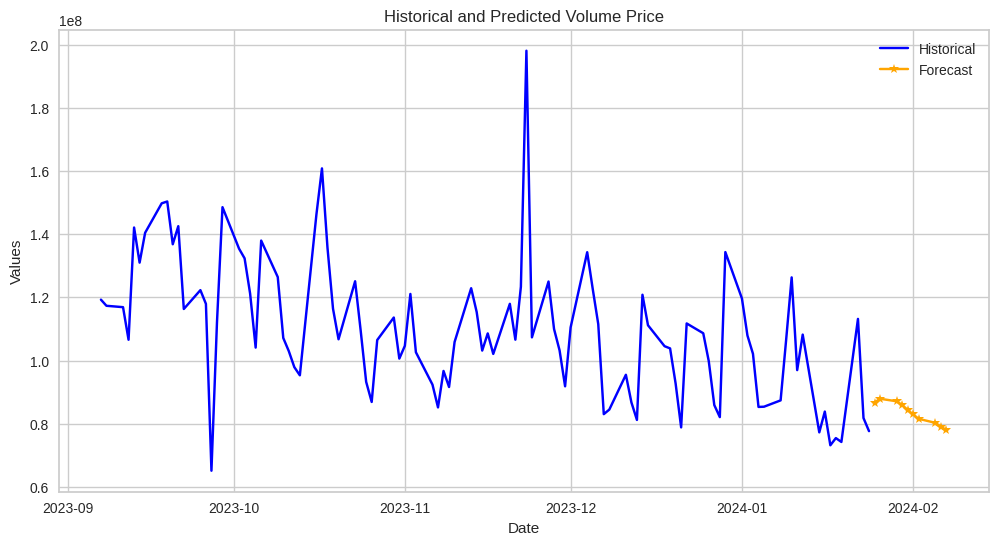

In [ ]:
volume = df['Volume']

# the fitted Holt model
volume_model = Holt(df['Volume'])
volume_results = volume_model.fit(smoothing_level=0.1)
volume_trend = volume_results.fittedvalues
volume_level = volume_results.level
volume_residual = df['Volume'] - volume_trend


# Forecasting the trend component
forecast_steps = 10  # Number of steps to forecast ahead

# Forecasting future trend values
volume_trend_forecast = volume_results.forecast(steps=forecast_steps)

# Creating a date range for the forecast
volume_trend_forecast_index = pd.date_range(start=volume_trend.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

# Creating a DataFrame for the forecasted trend
volume_trend_forecast_df = pd.DataFrame(volume_trend_forecast, index=volume_trend_forecast_index, columns=['volume_trend_forecast'])

# sum the predicted trend and predicted residual values to get the final forecast
forecast_df['volume_residual_final'] = forecast_df[0] + volume_trend_forecast_df['volume_trend_forecast']


# Plotting the final forecast of original volume
plt.figure(figsize=(12, 6))
plt.plot(volume[-100:], label='Historical', color='blue')
plt.plot(forecast_df.index, forecast_df['volume_residual_final'], label='Forecast', color='orange', marker='*')
plt.title('Historical and Predicted Volume Price')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Get the historical close prices for the last 10 days for comparison
actual_values = volume[-10:]

# Get the corresponding forecasted close prices
predicted_values = forecast_df['volume_residual_final']

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 194377069367685.3
